In [1]:
import pandas as pd

In [ ]:
CIDADES = {
    # "Touba": {
    #     "arquivo": "datasets/solar-measurementssenegal-toubaifcqc.csv",
    #     "tipo": "wb",
    #     "targets": ["dhi_rsi", "ghi_pyr", "ghi_sil"],
    #     "ignorar": ["dhi_rsi", "ghi_pyr", "ghi_sil"],
    #     "neurons": [[50, 50], [100, 200], [100, 50]],
    #     "dropouts": [[0.25, 0.25], [0.25, 0.25], [0, 0]],
    #     "epochs": [20, 40, 30],
    #     "batch_size": [128, 128, 128]
    # },

    # "Fatick": {
    #     "arquivo": "datasets/solar-measurementssenegal-fatickifcqc.csv",
    #     "tipo": "wb",
    #     "targets": ["dhi_rsi", "ghi_pyr", "ghi_sil"],
    #     "ignorar": ["dhi_rsi", "ghi_pyr", "ghi_sil"],
    #     "neurons": [[100, 50], [100, 50], [50, 50]],
    #     "dropouts": [[0.25, 0.25], [0.0, 0.25], [0.25, 0.25]],
    #     "epochs": [20, 50, 150],
    #     "batch_size": [128, 128, 128]
    # },

    # "SA Northern Cape": {
    #     "arquivo": "datasets/Timeseries_SA_northern_cape_2005_2016.csv",
    #     "tipo": "tmy",
    #     "targets": ["GSR"],
    #     "ignorar": ["GSR", "DSR"],
    #     "neurons": [[100, 50]],
    #     "dropouts": [[0, 0]],
    #     "epochs": [20],
    #     "batch_size": [512]
    # },

    # "CAR Vakaga": {
    #     "arquivo": "datasets/Timeseries_CAR_vakaga_2005_2016.csv",
    #     "tipo": "tmy",
    #     "targets": ["GSR"],
    #     "ignorar": ["GSR", "DSR"],
    #     "neurons": [[200, 200, 100]],
    #     "dropouts": [[0, 0, 0]],
    #     "epochs": [30],
    #     "batch_size": [512]
    # },

    # "Egypt Mut": {
    #     "arquivo": "datasets/Timeseries_egypt_mut_2005_2016.csv",
    #     "tipo": "tmy",
    #     "targets": ["GSR"],
    #     "ignorar": ["GSR", "DSR"],
    #     "neurons": [[200, 200, 100]],
    #     "dropouts": [[0, 0, 0]],
    #     "epochs": [7],
    #     "batch_size": [128]
    # },

    # "Algeria Tamanrasset": {
    #     "arquivo": "datasets/Timeseries_algeria_tamanrasset_2005_2016.csv",
    #     "tipo": "tmy",
    #     "targets": ["GSR"],
    #     "ignorar": ["GSR", "DSR"],
    #     "neurons": [[100, 100, 50]],
    #     "dropouts": [[0, 0, 0]],
    #     "epochs": [100],
    #     "batch_size": [512]
    # },

    # "Nigeria Borno": {
    #     "arquivo": "datasets/Timeseries_nigeria_borno_2005_2016.csv",
    #     "tipo": "tmy",
    #     "targets": ["DSR"],
    #     "ignorar": ["GSR", "DSR"],
    #     "neurons": [[100, 50]],
    #     "dropouts": [[0, 0]],
    #     "epochs": [50],
    #     "batch_size": [512]
    # },

    "Nigeria Abuja": {
        "arquivo": "datasets/SARAH_Nigeria_Abuja_v2.csv",
        "tipo": "sarah",
        "targets": ["DNI"],
        "ignorar": ["DNI"],
        "neurons": [[200, 200, 50]],
        "dropouts": [[0, 0, 0]],
        "epochs": [100],
        "batch_size": [128]
    },

    "Nigeria Akure": {
        "arquivo": "datasets/SARAH_Nigeria_Akure_v2.csv",
        "tipo": "sarah",
        "targets": ["DNI"],
        "ignorar": ["DNI"],
        "neurons": [[200, 200, 100]],
        "dropouts": [[0, 0, 0]],
        "epochs": [100],
        "batch_size": [128]
    }
}

OTIMIZADORES = ["adam", "sgd"]
LRS = [1e-3, 5e-4, 1e-4]


In [3]:
def carregar_wb(path):
    df = pd.read_csv(path, sep=';')
    df['time'] = pd.to_datetime(df['time'])

    df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df['hour'] = df['time'].dt.hour
    df['minute'] = df['time'].dt.minute

    df.drop(columns=['time', 'comments'], inplace=True)

    return df[
        ['year','month','day','hour','minute','air_temperature',
         'relative_humidity','wind_speed','wind_from_direction',
         'wind_speed_calc','sensor_cleaning','precipitation',
         'barometric_pressure','dhi_rsi','ghi_sil','ghi_pyr']
    ]


In [4]:
def carregar_tmy(path):
    df = pd.read_csv(
        path, sep=',', skiprows=8, skipfooter=12, engine='python'
    )

    df['time'] = pd.to_datetime(df['time'], format="%Y%m%d:%H%M")

    df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df['hour'] = df['time'].dt.hour

    df.drop(columns=['time','Int','Gr(i)'], inplace=True)

    df = df.rename(columns={ 'Gb(i)': 'GSR', 'Gd(i)': 'DSR' })

    return df[['year','month','day','hour','H_sun','T2m','WS10m','GSR','DSR']]


In [5]:
def carregar_sarah(path):
  df = pd.read_csv(path, sep=';')

  df['time'] = pd.to_datetime(df['time'], format="%d/%m/%Y")

  df['year'] = df['time'].dt.year
  df['month'] = df['time'].dt.month
  df['day'] = df['time'].dt.day

  df.drop(columns=['time'], inplace=True)

  return df[['year','month','day','SDU','DNI']]


In [6]:
def carregar_dataframe(cidade, config):
    if config["tipo"] == "wb":
        return carregar_wb(config["arquivo"])
    elif config["tipo"] == "tmy":
        return carregar_tmy(config["arquivo"])
    elif config["tipo"] == "sarah":
      return carregar_sarah(config["arquivo"])

In [7]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

In [8]:
def criar_loaders(df, target, ignorar, batch_size):
    X = df.drop(columns=ignorar).values
    y = df[target].values.reshape(-1, 1)

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y)

    n = len(df)

    # Mantém 10% para teste
    t_test = int(0.9 * n)

    # Dentro dos 90%, divide 80/20 -> 72% treino, 18% val
    t_train = int(0.8 * t_test)

    # Splits finais
    X_train = torch.tensor(X[:t_train], dtype=torch.float32)
    y_train = torch.tensor(y[:t_train], dtype=torch.float32)

    X_val   = torch.tensor(X[t_train:t_test], dtype=torch.float32)
    y_val   = torch.tensor(y[t_train:t_test], dtype=torch.float32)

    X_test  = torch.tensor(X[t_test:], dtype=torch.float32)
    y_test  = torch.tensor(y[t_test:], dtype=torch.float32)

    train_loader = DataLoader(
        TensorDataset(X_train, y_train),
        batch_size=batch_size,
        shuffle=False  # séries temporais não usam shuffle
    )

    val_loader = DataLoader(
        TensorDataset(X_val, y_val),
        batch_size=batch_size,
        shuffle=False
    )

    test_loader = DataLoader(
        TensorDataset(X_test, y_test),
        batch_size=batch_size,
        shuffle=False
    )

    return train_loader, val_loader, test_loader, X_train.shape[1], scaler_y

In [9]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, num_features, num_outputs, neurons, dropouts):
        super().__init__()

        layers = []
        in_f = num_features

        for out_f, drop in zip(neurons, dropouts):
            layers.append(nn.Linear(in_f, out_f))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(drop))
            in_f = out_f

        layers.append(nn.Linear(in_f, num_outputs))

        self.rede = nn.Sequential(*layers)

    def forward(self, x):
        return self.rede(x)


In [10]:
models_data = []

for cidade, cfg in CIDADES.items():

    df = carregar_dataframe(cidade, cfg)
    df = df.dropna()

    for idx, target in enumerate(cfg["targets"]):

        train_loader, val_loader, test_loader, n_features, scaler_y = criar_loaders(
            df,
            target,
            cfg["ignorar"],
            cfg["batch_size"][idx]
        )

        params = {
            "neurons": cfg["neurons"][idx],
            "dropouts": cfg["dropouts"][idx],
            "epochs": cfg["epochs"][idx]
        }

        models_data.append({
            "tipo": cfg['tipo'],
            "cidade": cidade,
            "target": target,
            "qnt_features": n_features,
            "train_loader": train_loader,
            "val_loader": val_loader,
            "test_loader": test_loader,
            "scaler_y": scaler_y,
            "params": params
        })


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\1921294753.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\1921294753.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';')


In [11]:
import torch
import numpy as np
import os

In [12]:
os.makedirs("output", exist_ok=True)

for md in models_data:
  for opt_name in OTIMIZADORES:
      for lr in LRS:

        model = Model(
            num_features=md["qnt_features"],
            num_outputs=1,
            neurons=md["params"]["neurons"],
            dropouts=md["params"]["dropouts"]
        )

        criterio = nn.MSELoss()

        if opt_name == "adam":
          opt = torch.optim.Adam(
              model.parameters(),
              lr=lr
          )
        elif opt_name == "sgd":
            opt = torch.optim.SGD(
                model.parameters(),
                lr=lr,
                momentum=0.9,
                weight_decay=1e-4
            )

        print(f"\nTreinando {md['cidade']} - {md['target']} | opt={opt_name} | lr={lr}")

        epochs = md["params"]["epochs"]
        
        best_val_loss = float("inf")
        best_state = None

        for epoch in range(epochs):
            model.train()
            epoch_loss = 0
            for Xb, yb in md["train_loader"]:

                pred = model(Xb)
                loss = criterio(pred, yb)

                opt.zero_grad()
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0) # para SGD apenas
                opt.step()

                epoch_loss += loss.item()

            epoch_loss /= len(md["train_loader"])
            
            # Validação
            model.eval()
            val_loss = 0

            with torch.no_grad():
                for Xv, yv in md["val_loader"]:
                    pred = model(Xv)
                    loss = criterio(pred, yv)
                    val_loss += loss.item()

            val_loss /= len(md["val_loader"])
            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {epoch_loss:.4f} | Val Loss: {val_loss:.4f}")
            
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_state = model.state_dict()
            
        os.makedirs('results3/models', exist_ok=True)
        torch.save(best_state, f"results3/models/{md['cidade']}_{md['target']}_{opt_name}_{lr}.pth")



Treinando Touba - dhi_rsi | opt=adam | lr=0.001
Epoch 1/20 | Train Loss: 0.3261 | Val Loss: 0.5561
Epoch 2/20 | Train Loss: 0.2195 | Val Loss: 0.4430
Epoch 3/20 | Train Loss: 0.1887 | Val Loss: 0.3820
Epoch 4/20 | Train Loss: 0.1801 | Val Loss: 0.3747
Epoch 5/20 | Train Loss: 0.1749 | Val Loss: 0.3629
Epoch 6/20 | Train Loss: 0.1740 | Val Loss: 0.3370
Epoch 7/20 | Train Loss: 0.1724 | Val Loss: 0.3374
Epoch 8/20 | Train Loss: 0.1708 | Val Loss: 0.3236
Epoch 9/20 | Train Loss: 0.1706 | Val Loss: 0.3127
Epoch 10/20 | Train Loss: 0.1681 | Val Loss: 0.2966
Epoch 11/20 | Train Loss: 0.1673 | Val Loss: 0.3022
Epoch 12/20 | Train Loss: 0.1666 | Val Loss: 0.2949
Epoch 13/20 | Train Loss: 0.1656 | Val Loss: 0.2884
Epoch 14/20 | Train Loss: 0.1648 | Val Loss: 0.2835
Epoch 15/20 | Train Loss: 0.1639 | Val Loss: 0.2830
Epoch 16/20 | Train Loss: 0.1626 | Val Loss: 0.2851
Epoch 17/20 | Train Loss: 0.1607 | Val Loss: 0.2857
Epoch 18/20 | Train Loss: 0.1604 | Val Loss: 0.2897
Epoch 19/20 | Train Loss

In [13]:
import matplotlib.pyplot as plt

def criar_plot(reals, preds, intervalo, xlabel, ylabel, marker, caminho):


  plt.figure(figsize=(12, 5))

  if marker:
    plt.plot(intervalo, reals, label="Real Data", linewidth=0.9, color='black', marker='o')
    plt.plot(intervalo, preds, label="Predição", linewidth=0.9, color='red', marker='+')
  else:
    plt.plot(intervalo, reals, label="Real Data", linewidth=0.9, color='black')
    plt.plot(intervalo, preds, label="Predição", linewidth=0.9, color='red')

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title("Real vs Predicted")
  plt.grid(True, alpha=0.3)
  plt.legend()
  plt.tight_layout()

  os.makedirs('results3/plots/temporal', exist_ok=True)
  save_path = os.path.join('results3/plots/temporal', f"{caminho}.png")
  plt.savefig(save_path, dpi=300, bbox_inches='tight')

  plt.show()
  plt.close()

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def plot_scatter_real_pred(reals, preds, title="", savepath=None):
    reals = reals.reshape(-1)
    preds = preds.reshape(-1)

    mae = mean_absolute_error(reals, preds)
    rmse = np.sqrt(mean_squared_error(reals, preds))
    r2 = np.corrcoef(reals, preds)[0, 1] ** 2

    plt.figure(figsize=(7, 6))
    plt.scatter(reals, preds, s=18, alpha=0.5, edgecolors="none", label="Pontos")

    # Linha ideal 1:1
    min_v = min(np.min(reals), np.min(preds))
    max_v = max(np.max(reals), np.max(preds))
    plt.plot([min_v, max_v], [min_v, max_v], 'r--', lw=2, label='Reta 1:1')

    # Métricas no canto
    txt = f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}\nR² = {r2:.3f}"
    plt.text(0.05, 0.95, txt, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round", fc="white", alpha=0.7))

    plt.xlabel("Real")
    plt.ylabel("Predito")
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.legend()

    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')

    plt.show()


In [15]:
def plot_residual_histogram(reals, preds, title="", savepath=None):
    reals = reals.reshape(-1)
    preds = preds.reshape(-1)
    residuals = preds - reals

    plt.figure(figsize=(7, 5))
    plt.hist(residuals, bins=40, alpha=0.7, color='steelblue', edgecolor='black')
    plt.axvline(0, color='red', linestyle='--', linewidth=2)

    plt.title(title + " - Histograma dos Resíduos")
    plt.xlabel("Resíduo (Predito - Real)")
    plt.ylabel("Frequência")
    plt.grid(alpha=0.3)

    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches='tight')

    plt.show()


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba dhi_rsi adam 0.001 :  54.586177825927734 89.66013846569444 0.7934928735179176


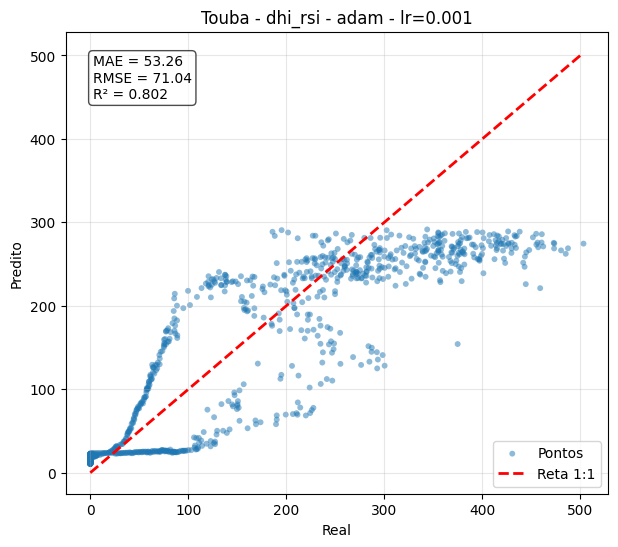

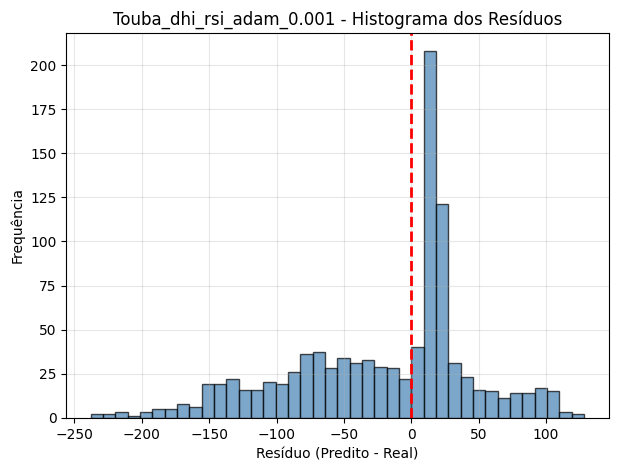

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba dhi_rsi adam 0.0005 :  46.018009185791016 76.37613478596407 0.8255459714015816


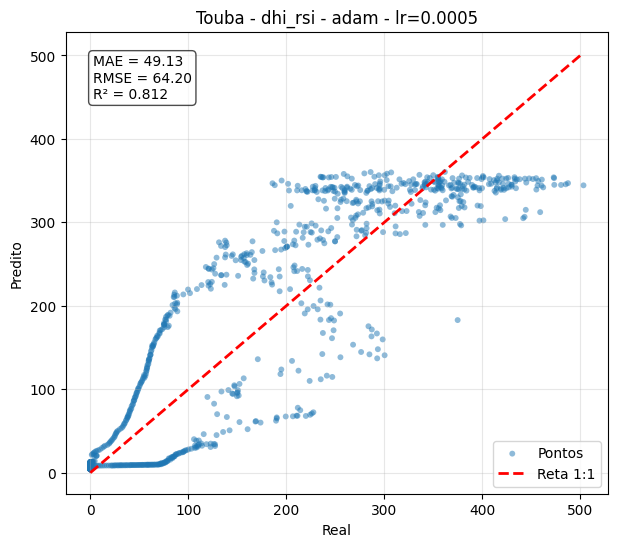

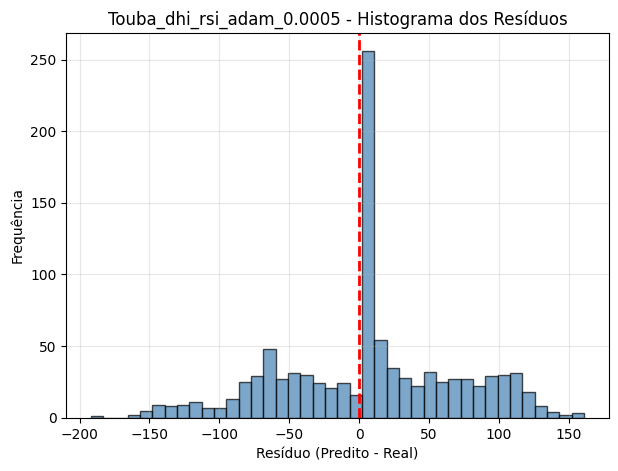

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba dhi_rsi adam 0.0001 :  60.98444747924805 99.98679111981492 0.7563049354330499


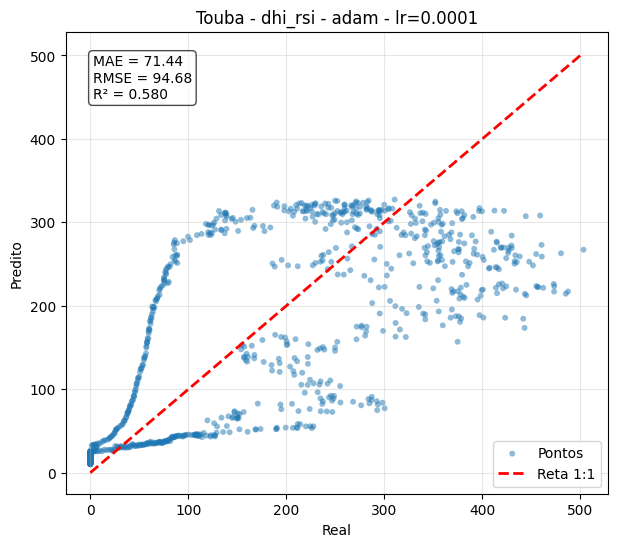

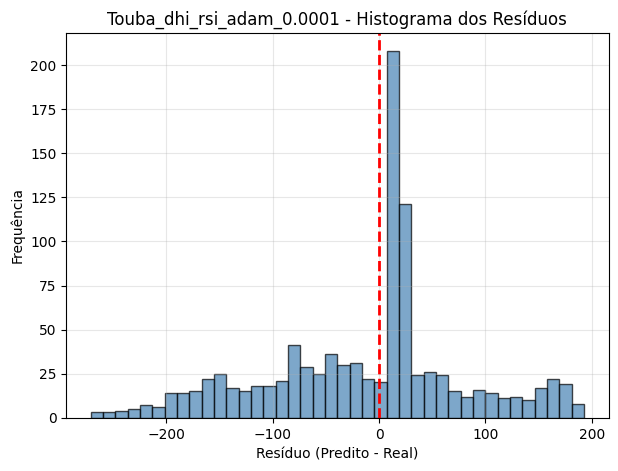

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba dhi_rsi sgd 0.001 :  57.975032806396484 99.17432568462465 0.7824024936171847


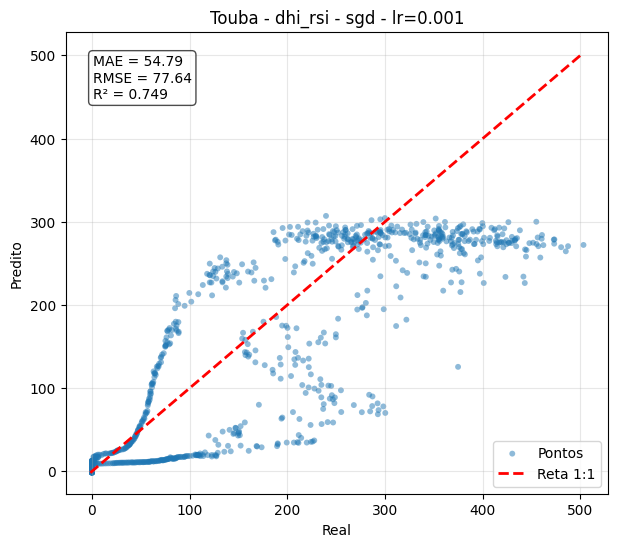

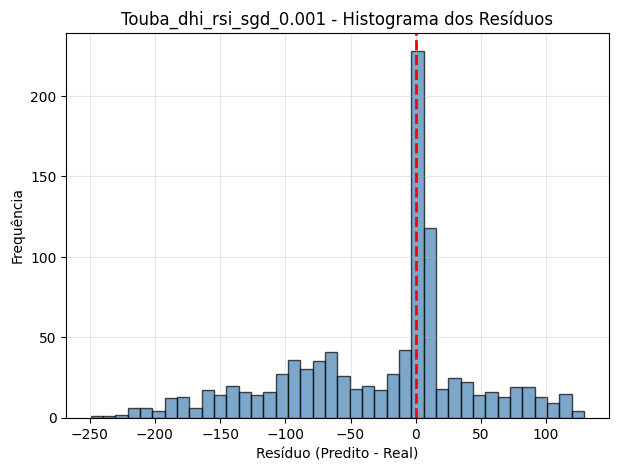

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba dhi_rsi sgd 0.0005 :  69.50271606445312 117.978894431377 0.7355427701799364


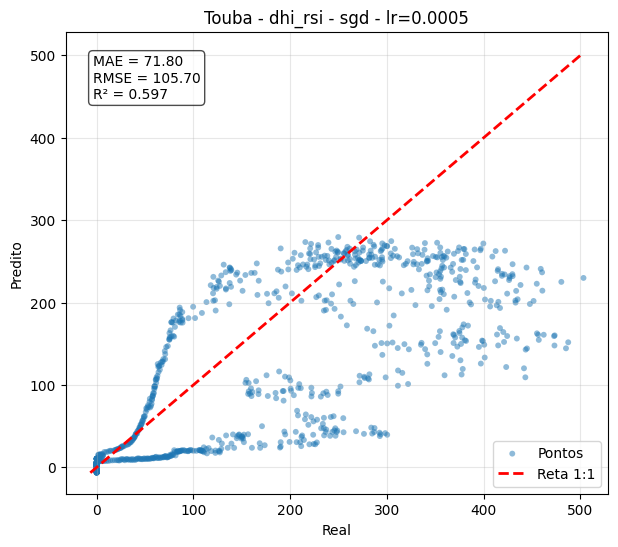

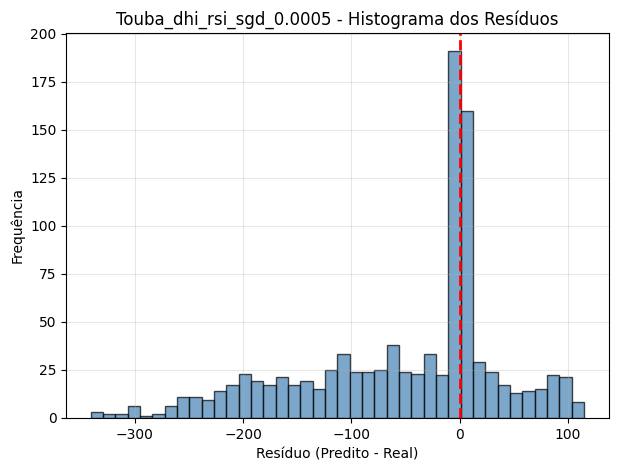

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba dhi_rsi sgd 0.0001 :  85.46855163574219 135.82259511491452 0.6803878924143244


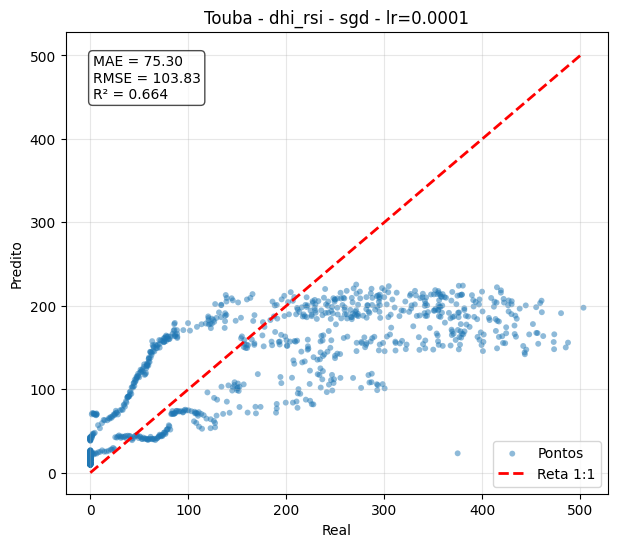

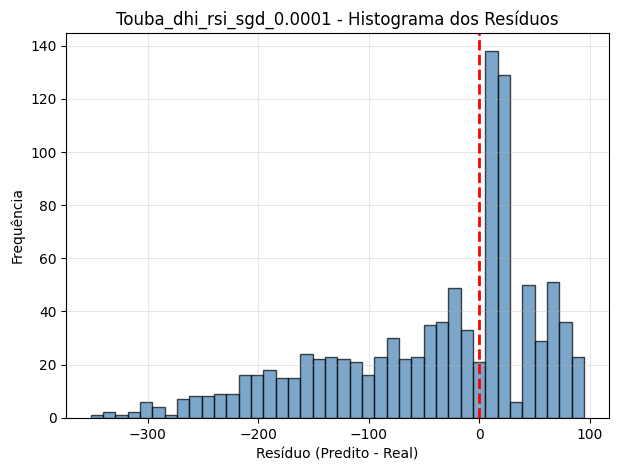

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_pyr adam 0.001 :  98.6454849243164 165.57107022929762 0.789052340819672


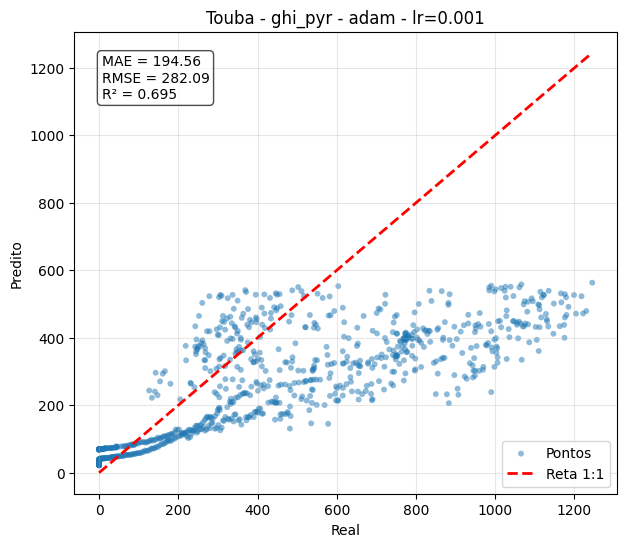

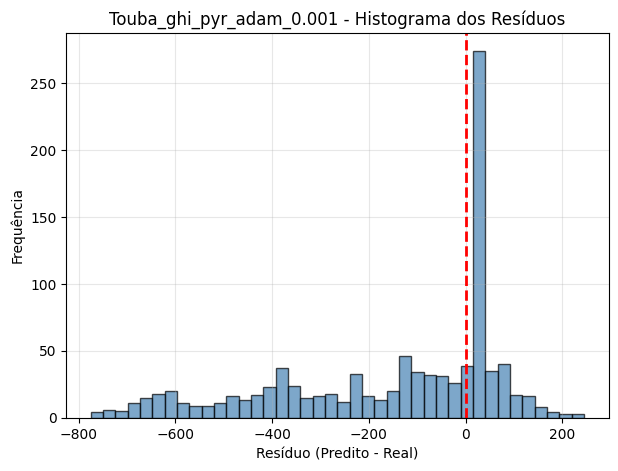

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_pyr adam 0.0005 :  94.63101959228516 159.8779686002734 0.8351046934670179


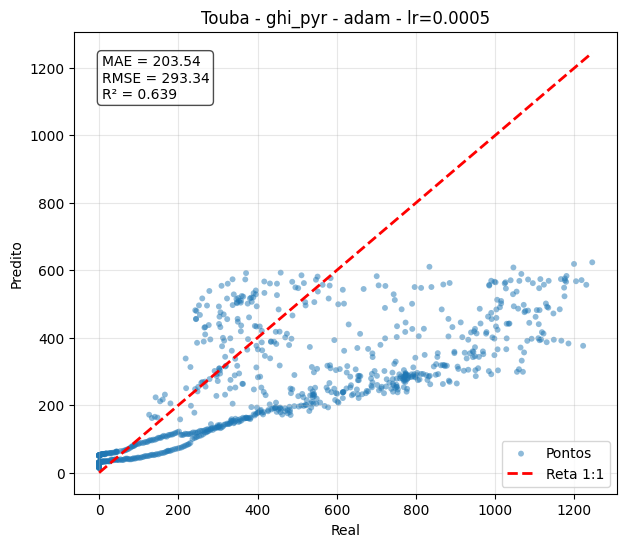

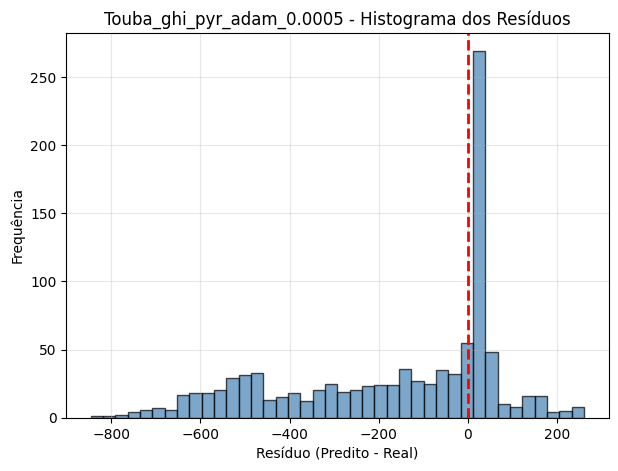

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_pyr adam 0.0001 :  100.16642761230469 160.10770910741618 0.8803065435514816


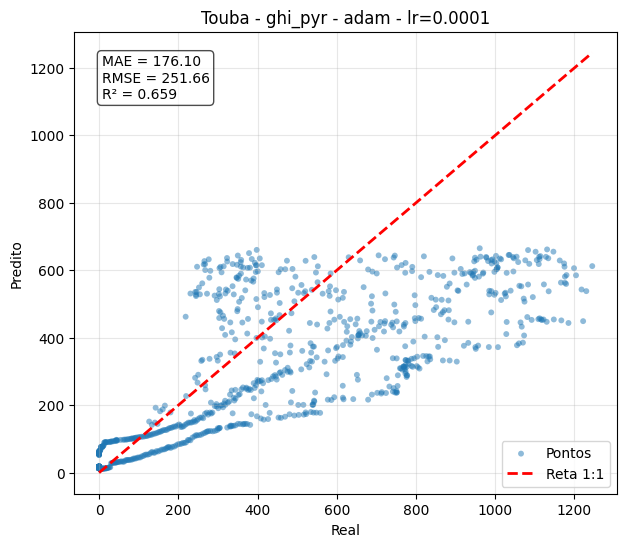

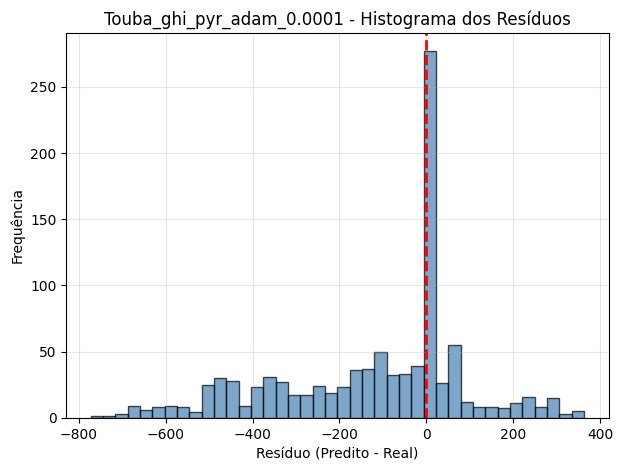

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_pyr sgd 0.001 :  73.25092315673828 123.56893714264318 0.9098186702871295


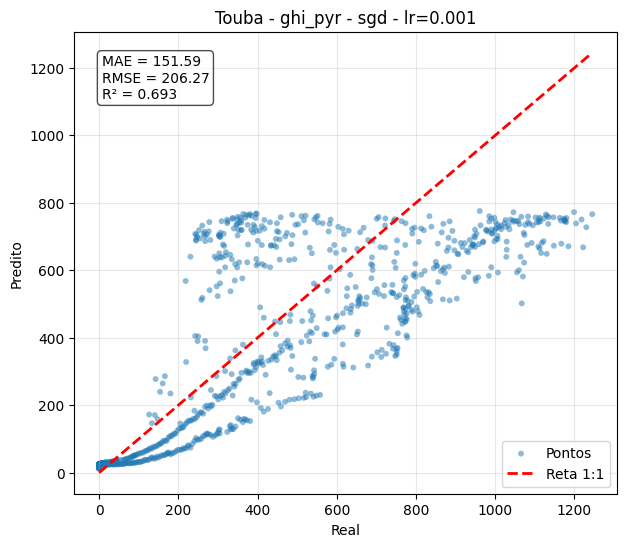

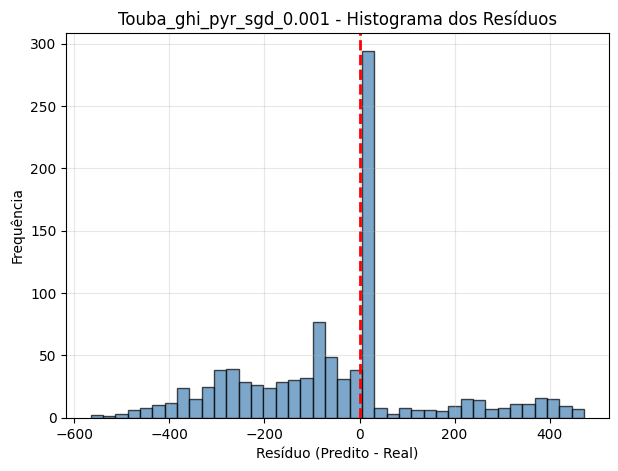

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_pyr sgd 0.0005 :  86.98703002929688 149.41547568776133 0.8517647875816744


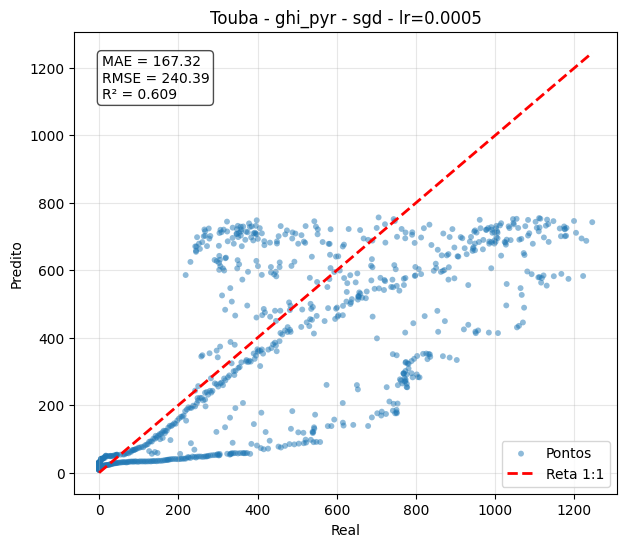

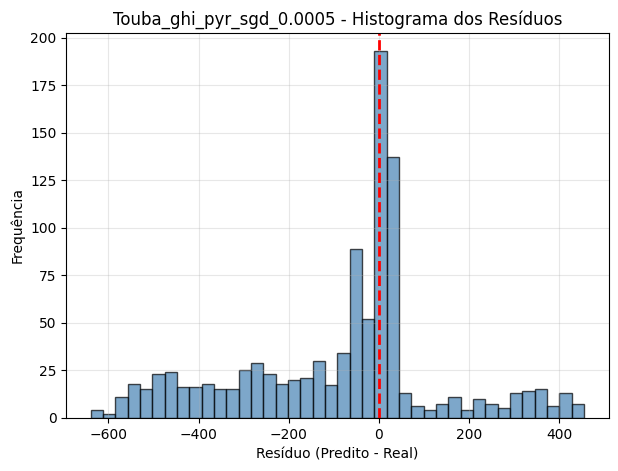

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_pyr sgd 0.0001 :  129.62840270996094 216.28786698807218 0.7962037098487657


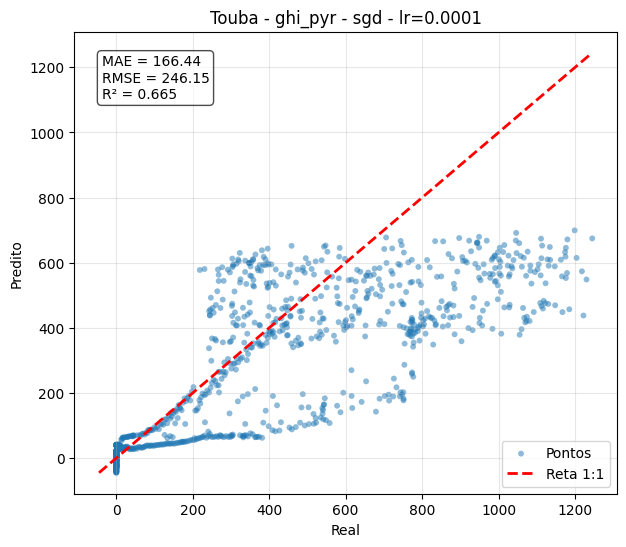

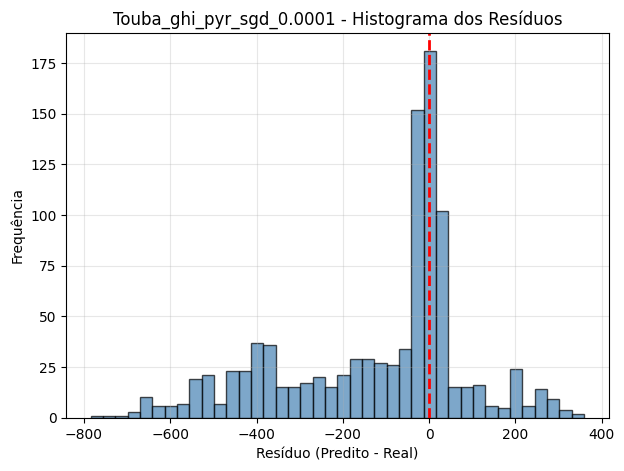

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_sil adam 0.001 :  57.93320846557617 104.05836609656862 0.8963946183864558


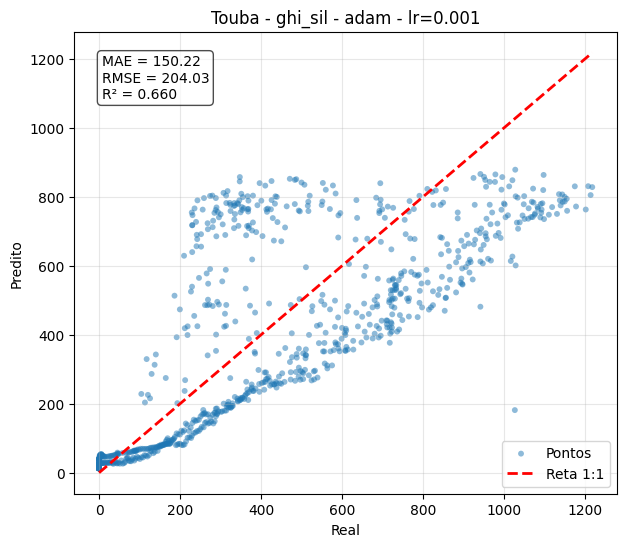

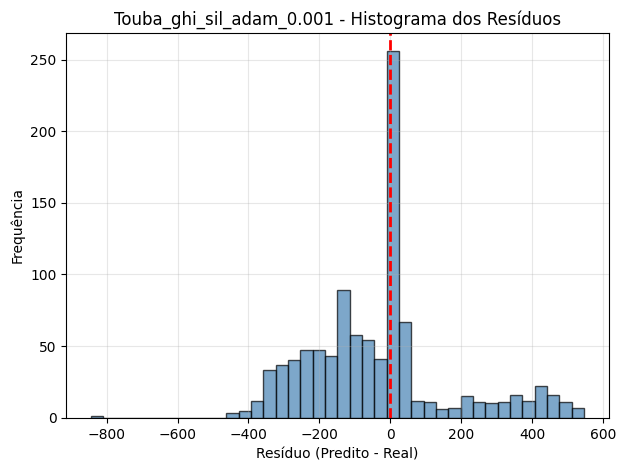

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_sil adam 0.0005 :  62.00900650024414 113.73841372998174 0.8801209382723916


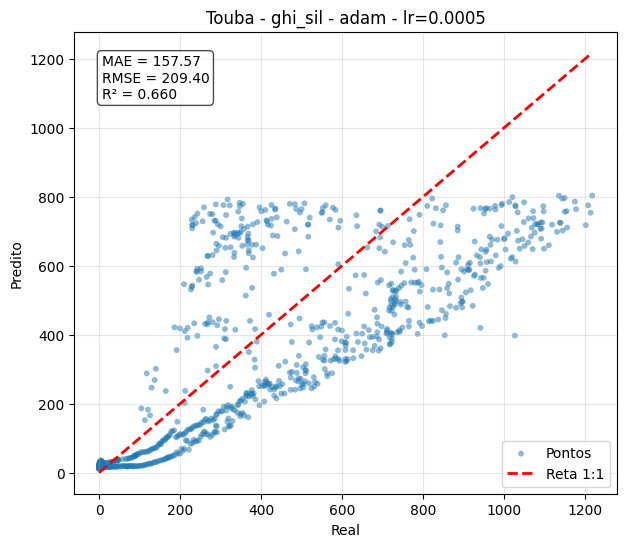

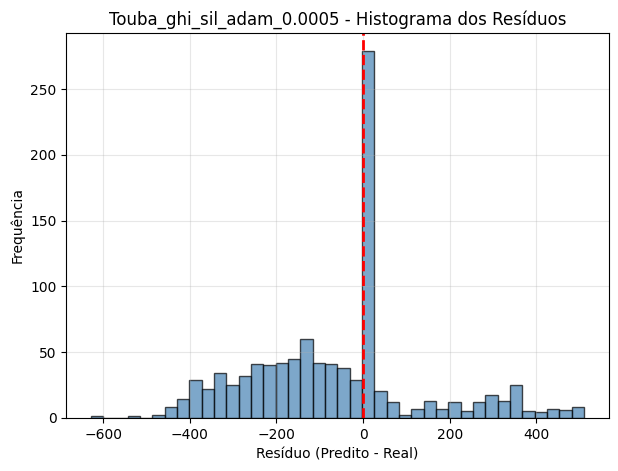

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_sil adam 0.0001 :  73.97696685791016 124.85089153541315 0.8577900341010968


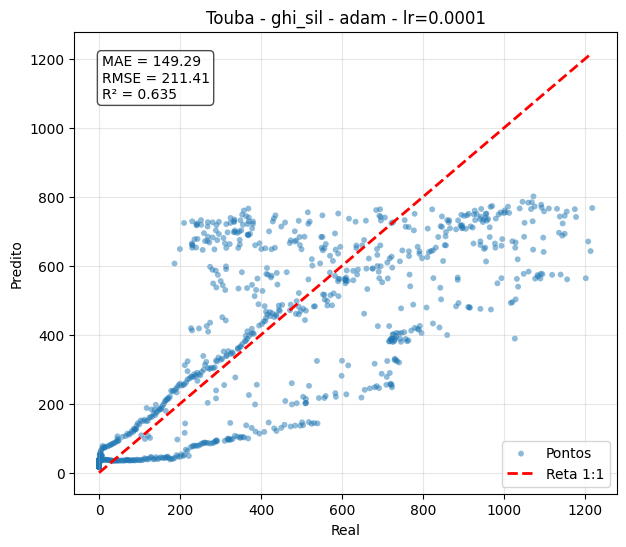

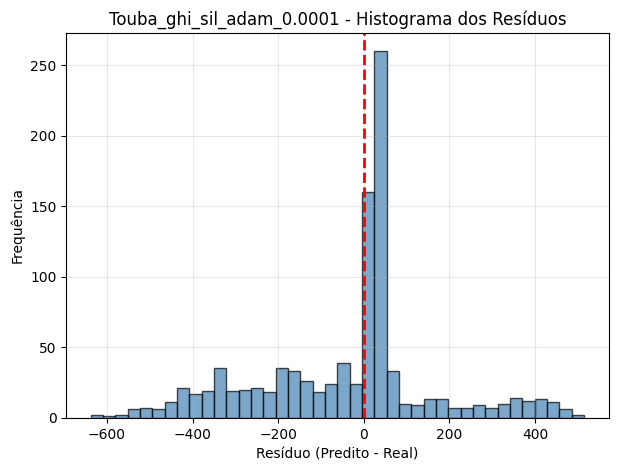

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_sil sgd 0.001 :  57.609703063964844 107.1428706287194 0.8914269959582584


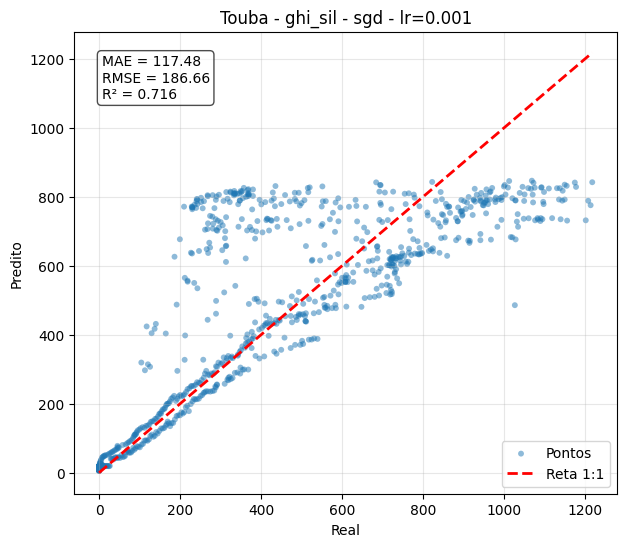

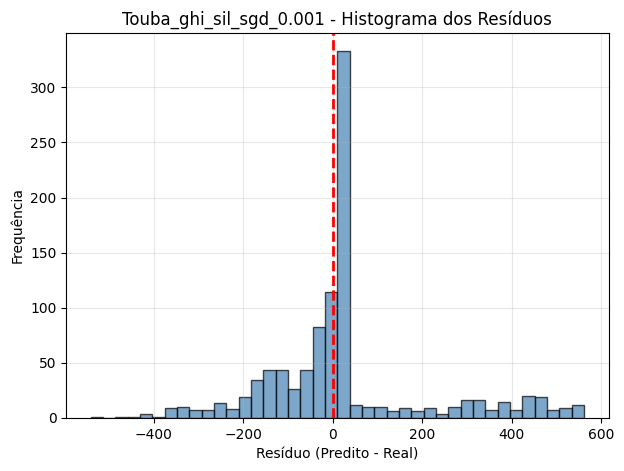

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_sil sgd 0.0005 :  62.82345962524414 111.28445744464948 0.8849059586038303


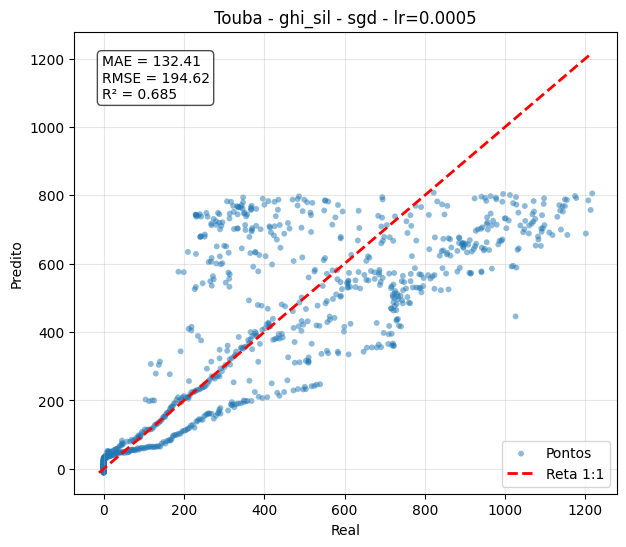

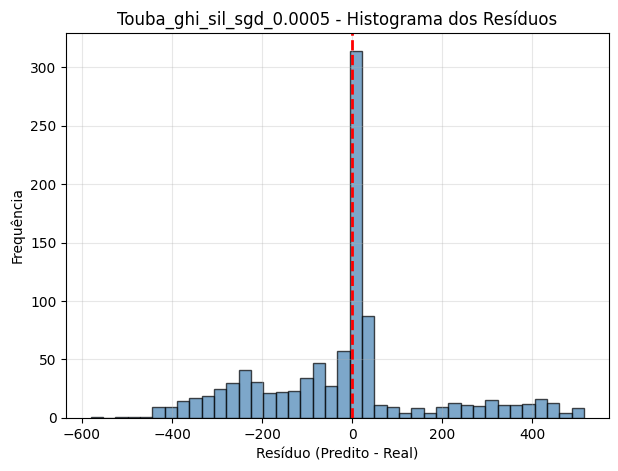

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Touba ghi_sil sgd 0.0001 :  118.08355712890625 183.24583257539584 0.8211814126869111


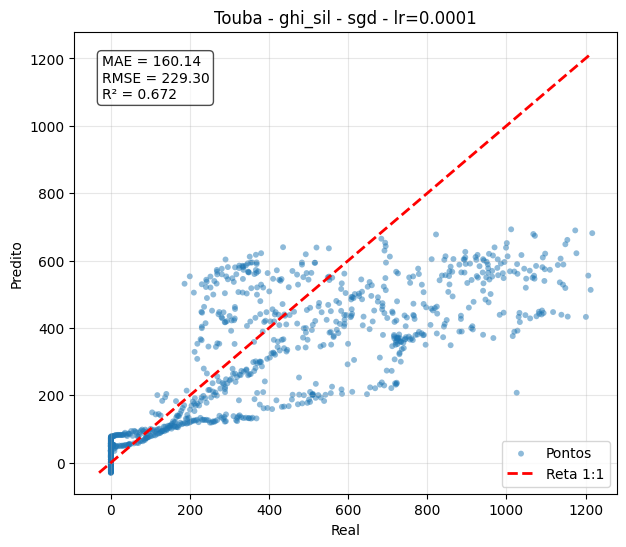

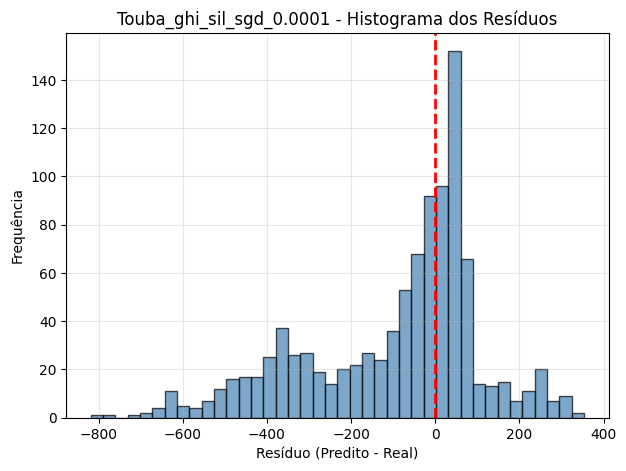

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick dhi_rsi adam 0.001 :  41.49448013305664 71.68680184381049 0.8488043006994681


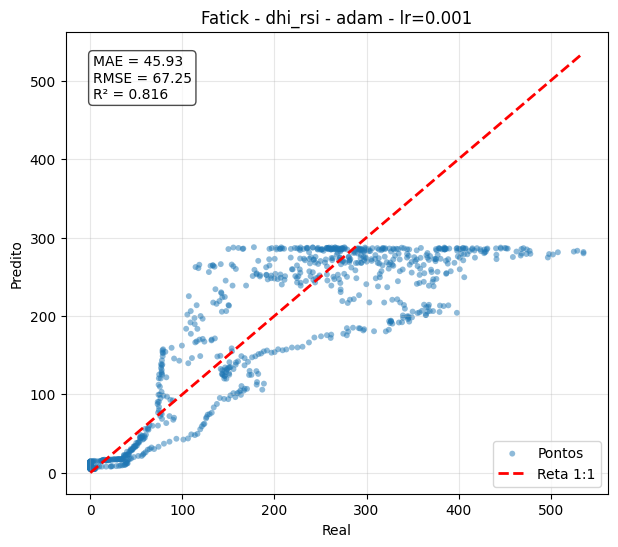

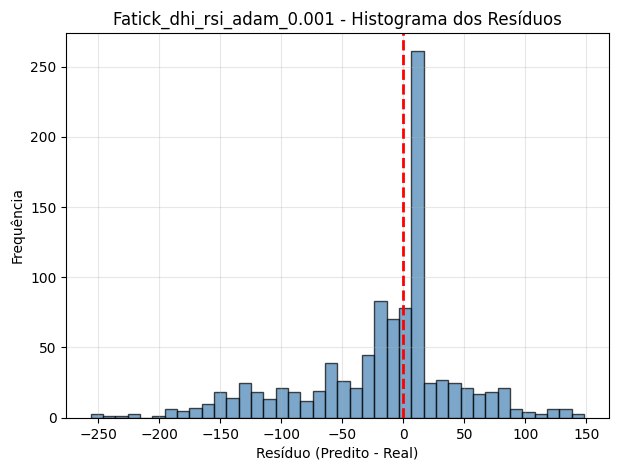

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick dhi_rsi adam 0.0005 :  42.927215576171875 73.35210793345512 0.8442286377511004


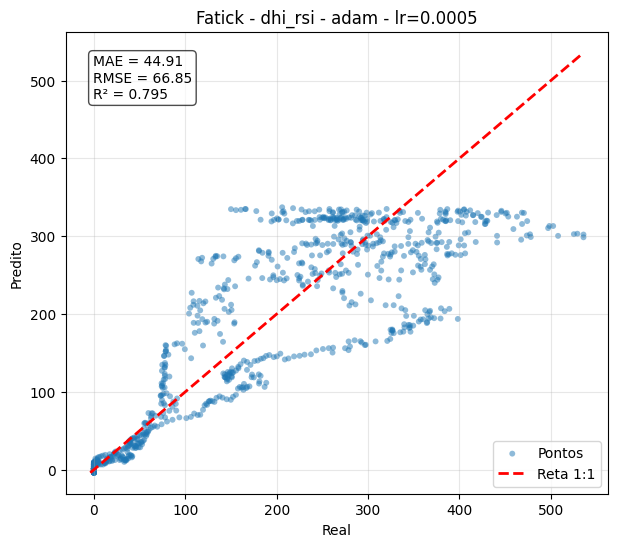

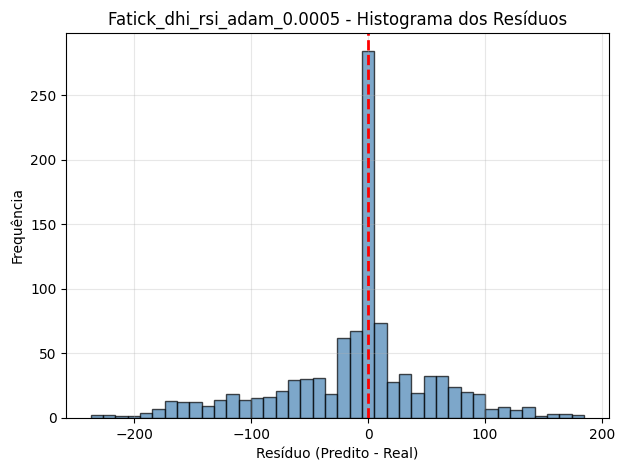

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick dhi_rsi adam 0.0001 :  50.565555572509766 82.17354028308777 0.8212721028585163


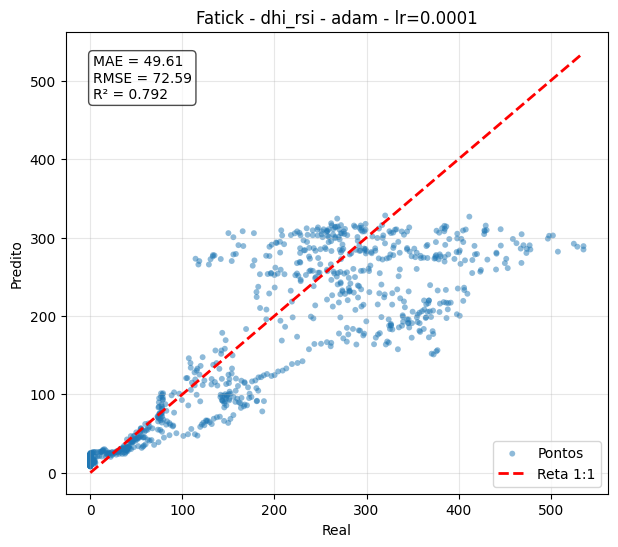

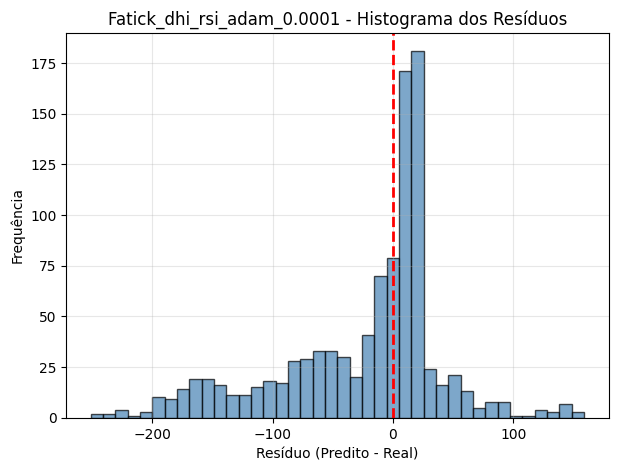

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick dhi_rsi sgd 0.001 :  44.85879135131836 78.36638646348159 0.8187761839288042


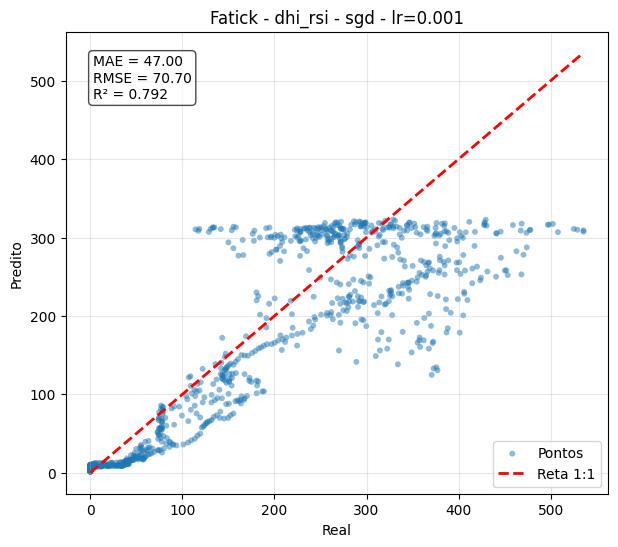

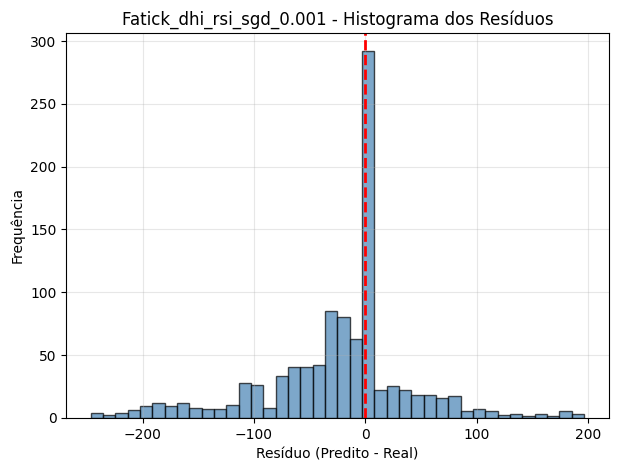

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick dhi_rsi sgd 0.0005 :  50.93014144897461 88.45071676857684 0.8035071125033864


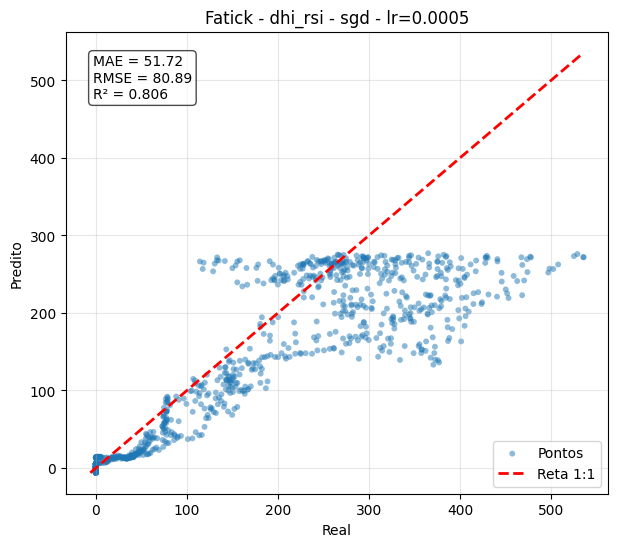

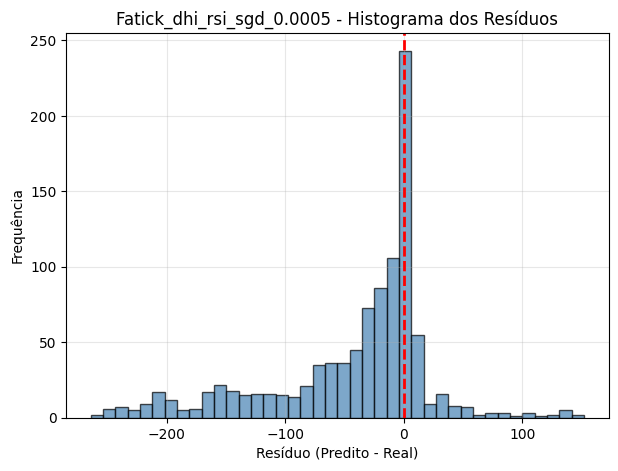

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick dhi_rsi sgd 0.0001 :  74.28258514404297 122.13375576340474 0.6821898548656269


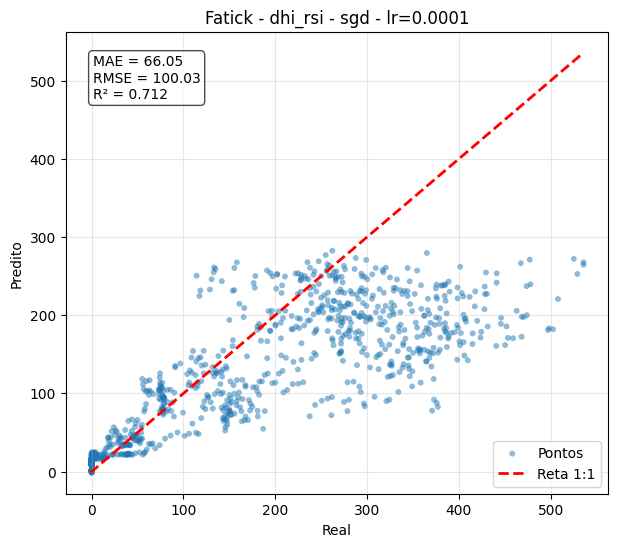

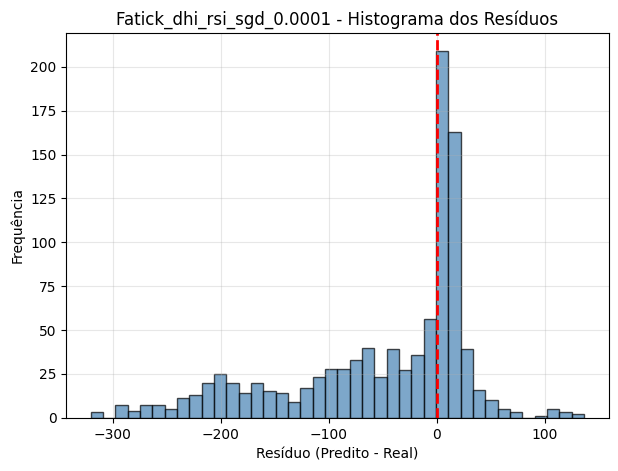

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_pyr adam 0.001 :  74.566162109375 120.4319942306653 0.8726306733527759


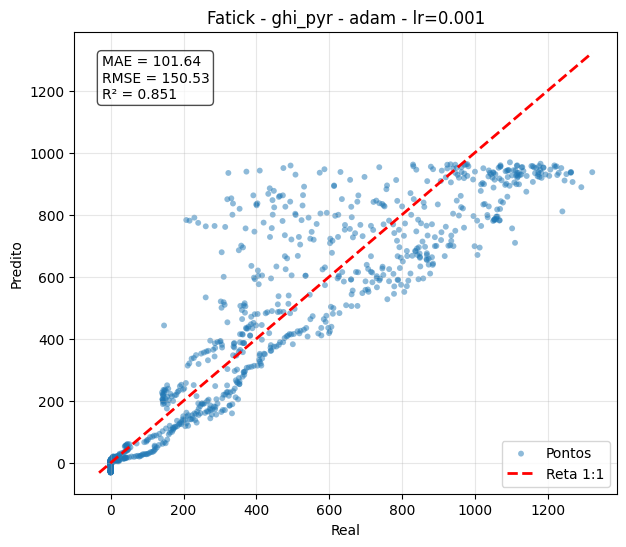

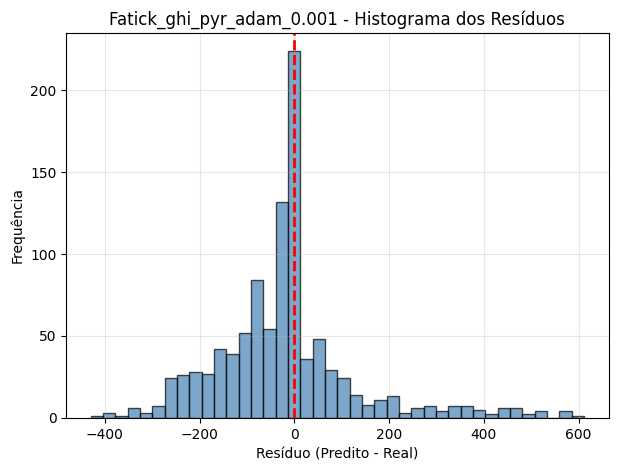

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_pyr adam 0.0005 :  78.11116790771484 124.62465521517001 0.8758998553752899


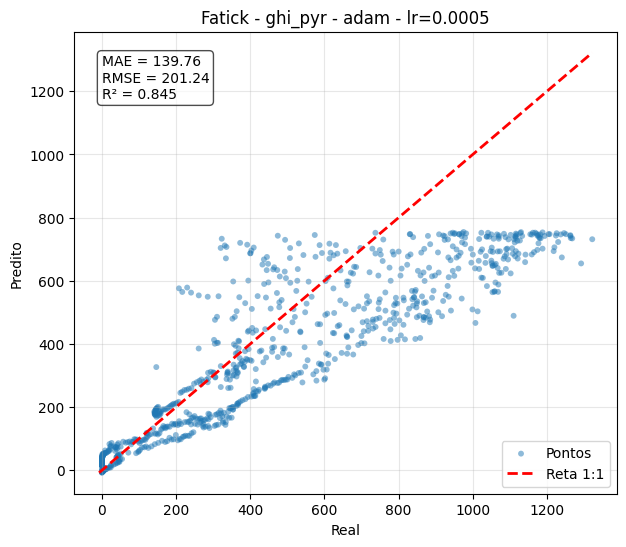

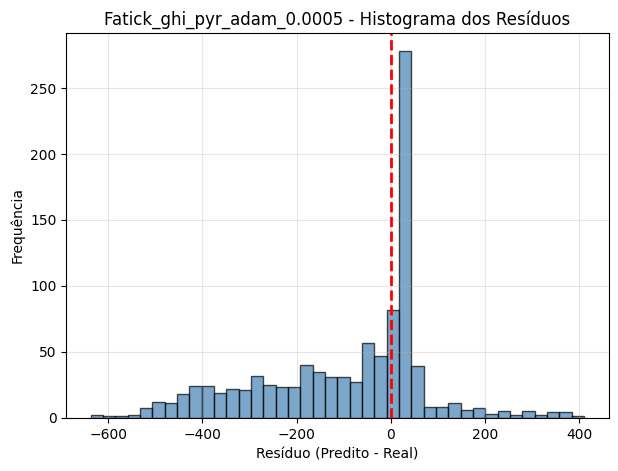

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_pyr adam 0.0001 :  77.96769714355469 117.49357944559141 0.8805072400889601


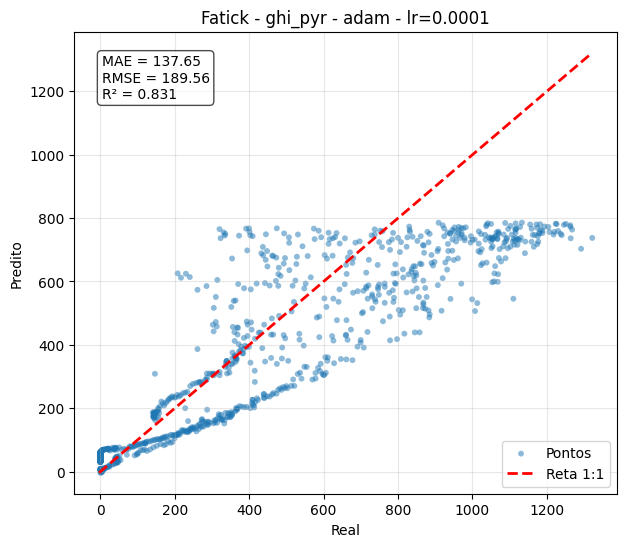

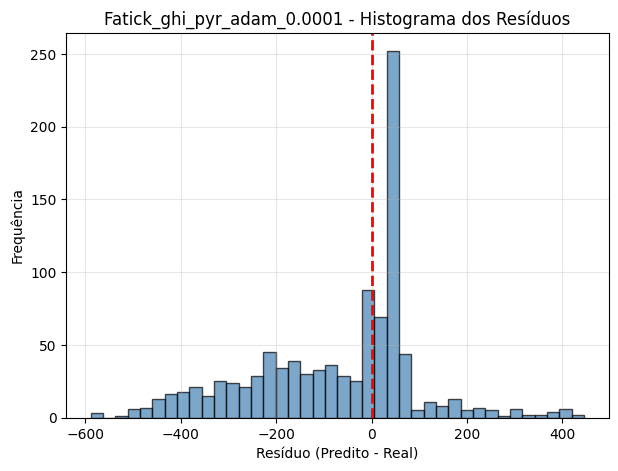

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_pyr sgd 0.001 :  74.13606262207031 123.43017778915535 0.8850173613792338


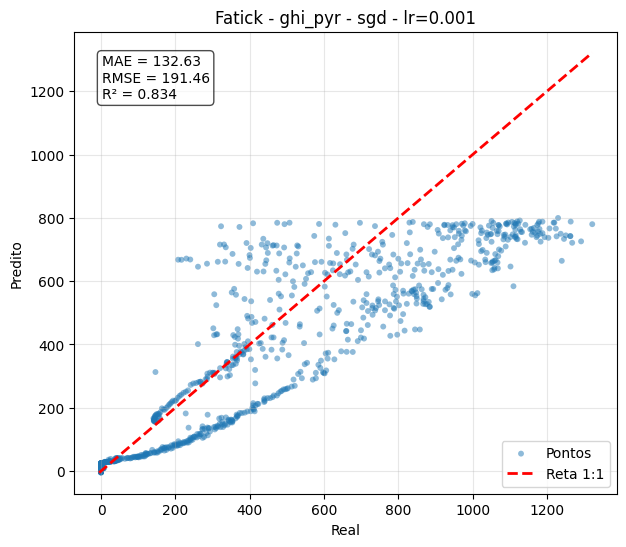

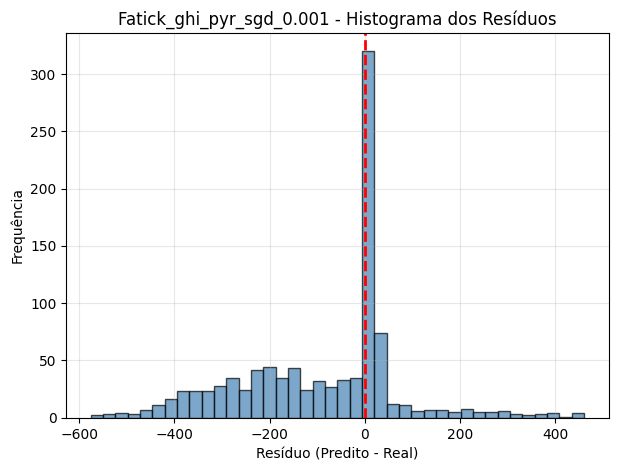

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_pyr sgd 0.0005 :  74.08351135253906 122.68248525156311 0.8803230717760497


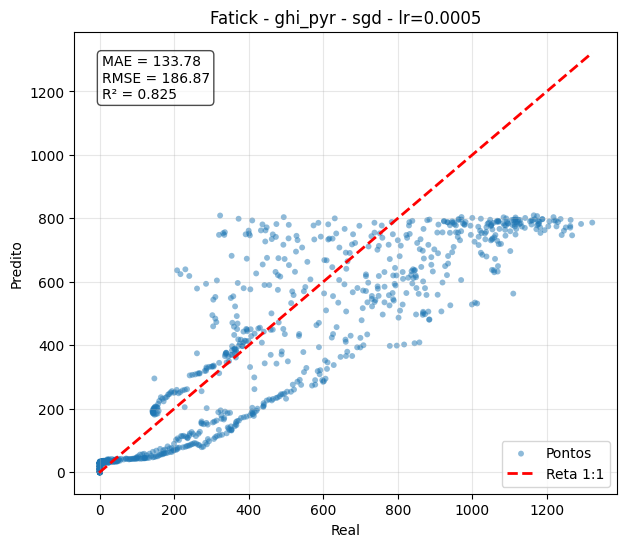

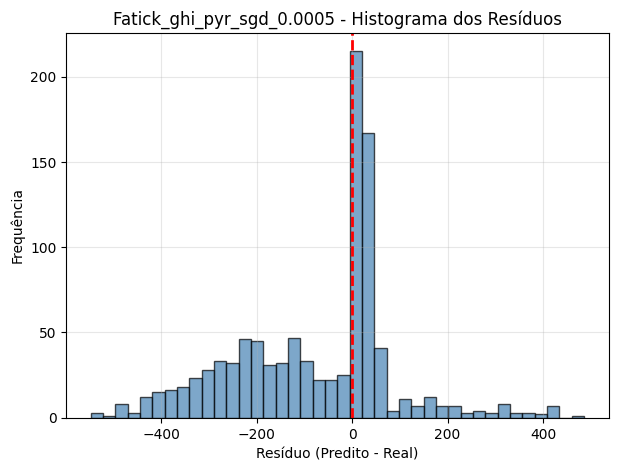

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_pyr sgd 0.0001 :  84.69242858886719 144.27825492342913 0.8595244894699443


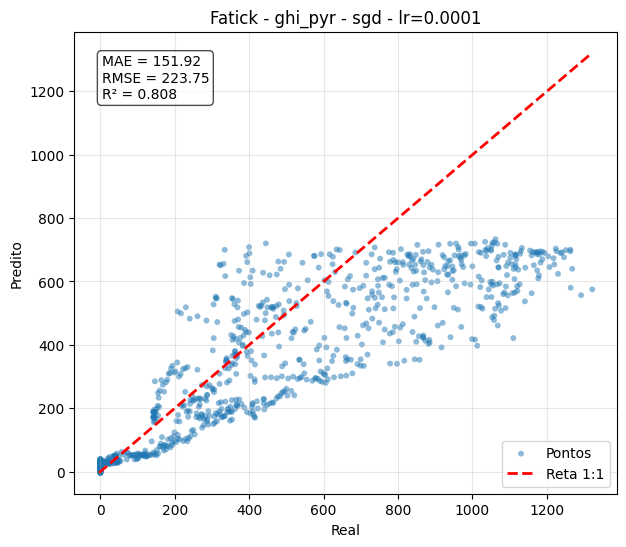

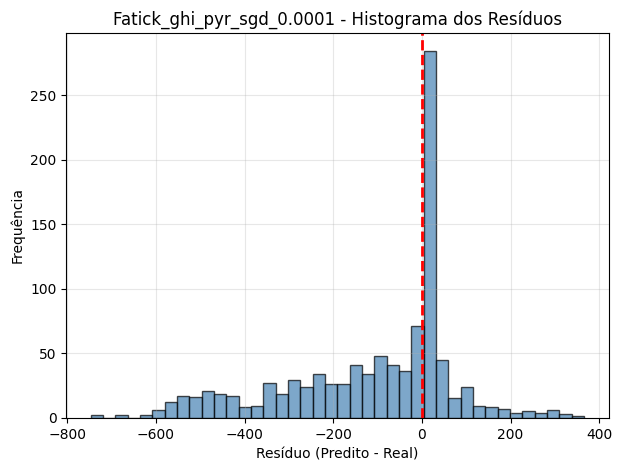

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_sil adam 0.001 :  108.08634185791016 186.244001581259 0.8309972928234189


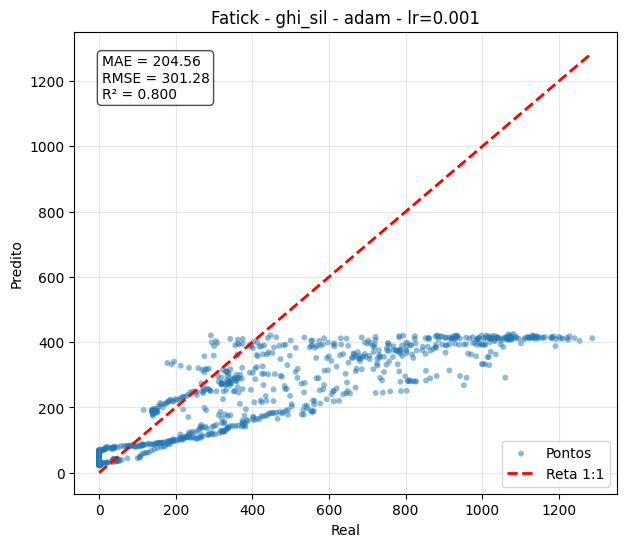

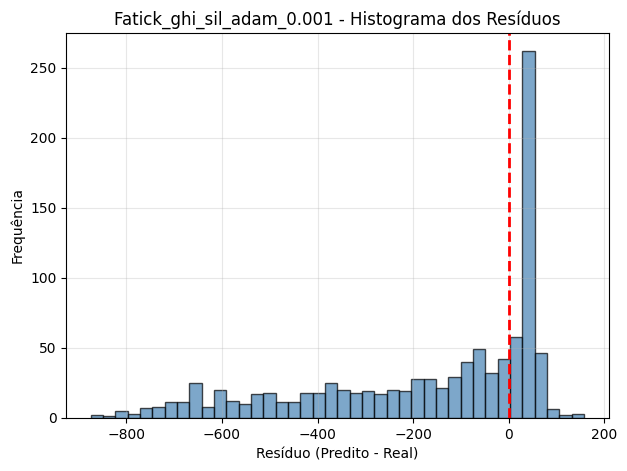

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_sil adam 0.0005 :  75.47124481201172 130.5134167552325 0.8904212530312381


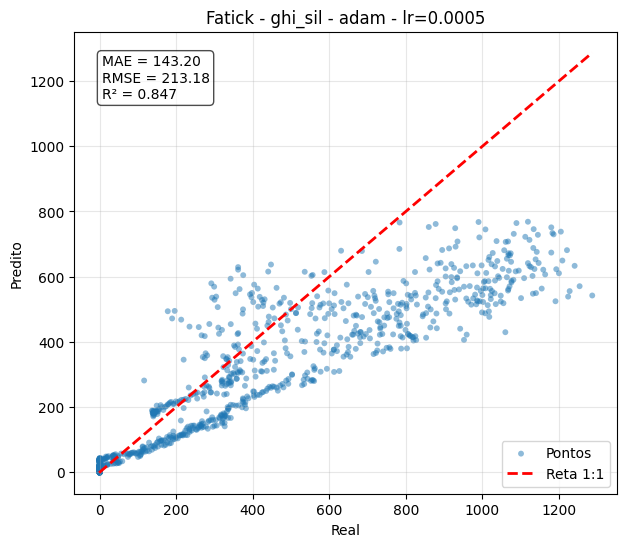

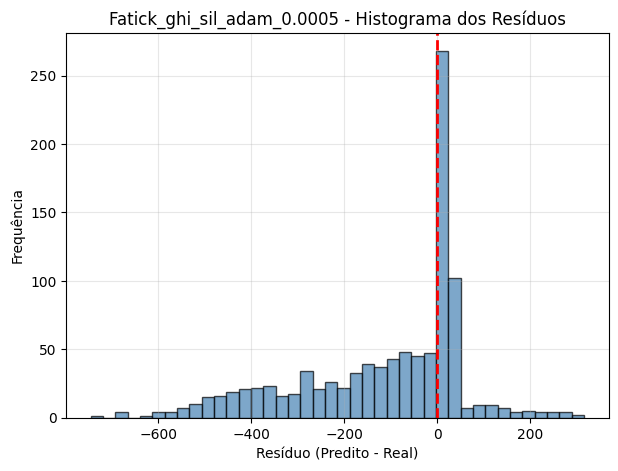

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_sil adam 0.0001 :  72.67721557617188 111.02798686451763 0.8887020343630395


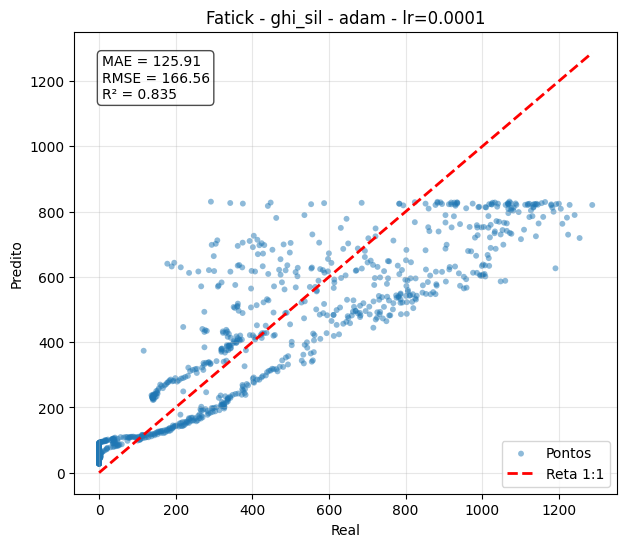

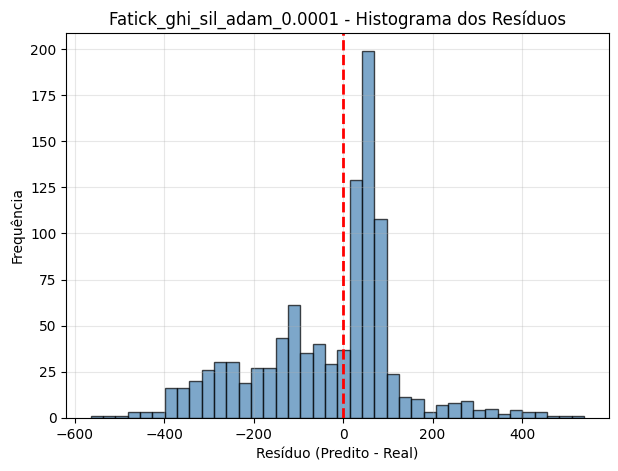

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_sil sgd 0.001 :  68.41807556152344 120.9542502934994 0.9004131691574795


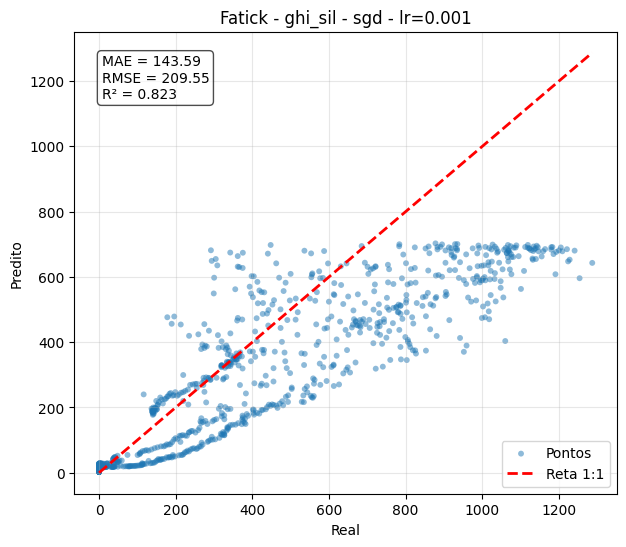

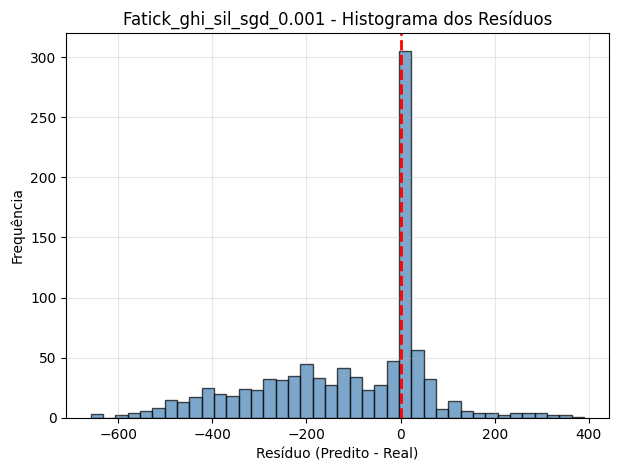

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_sil sgd 0.0005 :  63.330055236816406 107.85901623328715 0.8968017739093267


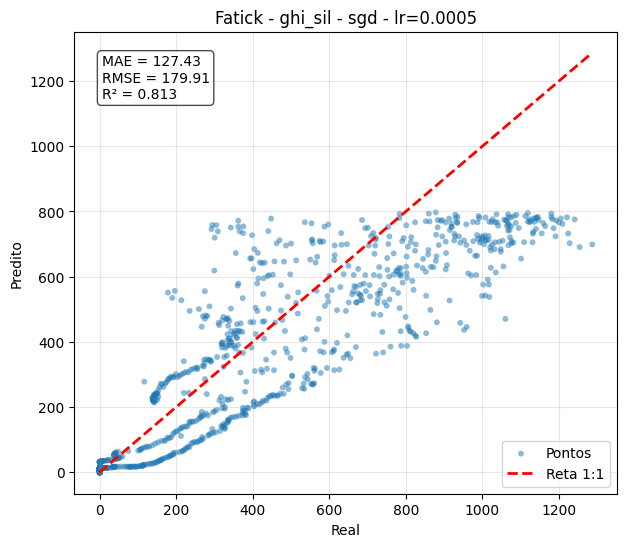

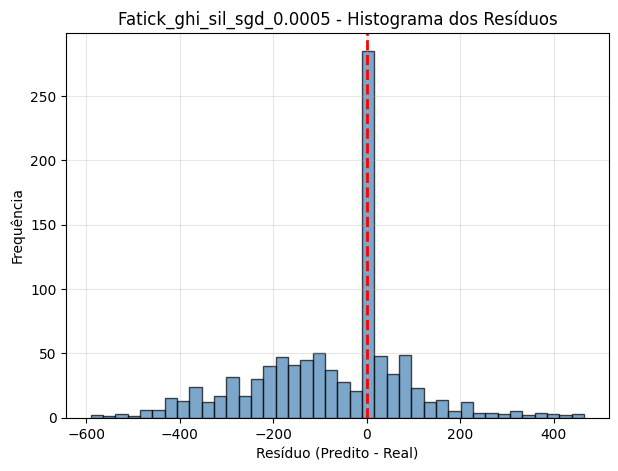

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Fatick ghi_sil sgd 0.0001 :  83.11079406738281 141.96137238699828 0.8661004417301837


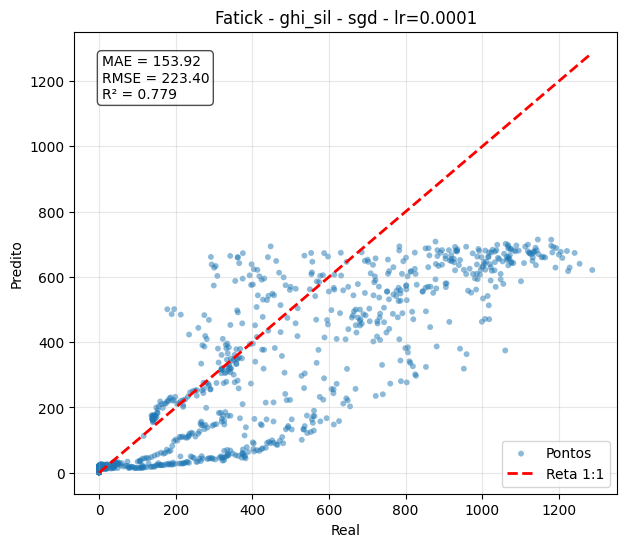

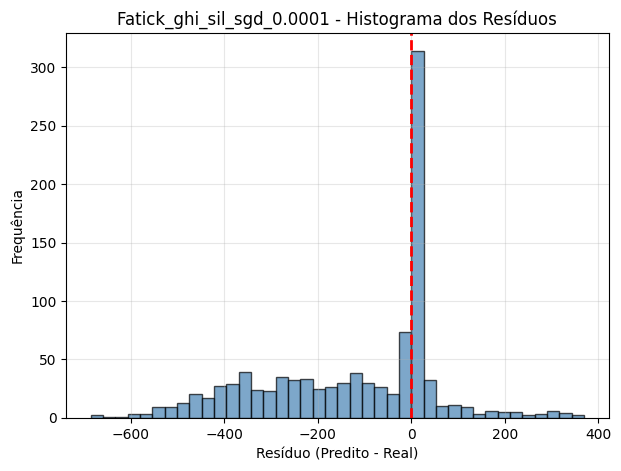

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


SA Northern Cape GSR adam 0.001 :  85.05860900878906 155.39774446360218 0.8828609815418914


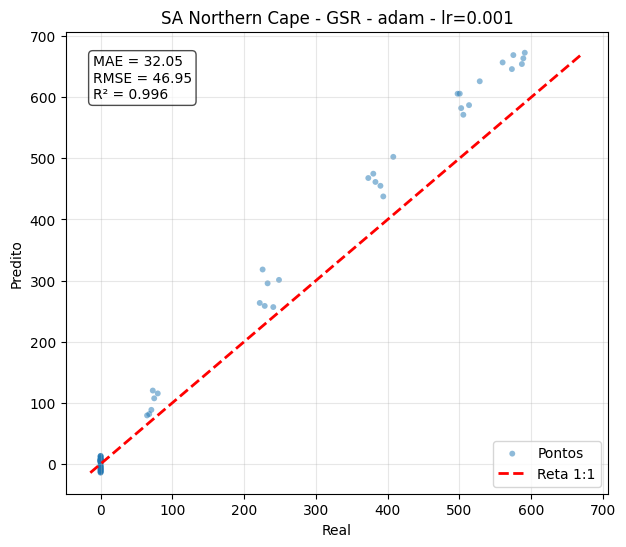

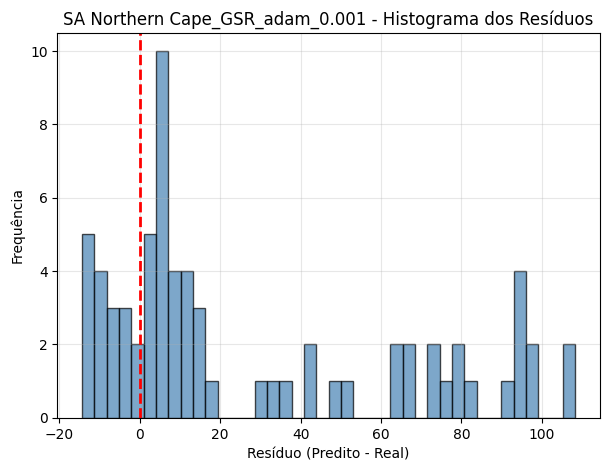

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


SA Northern Cape GSR adam 0.0005 :  72.30408477783203 132.03195635905726 0.8813565239569653


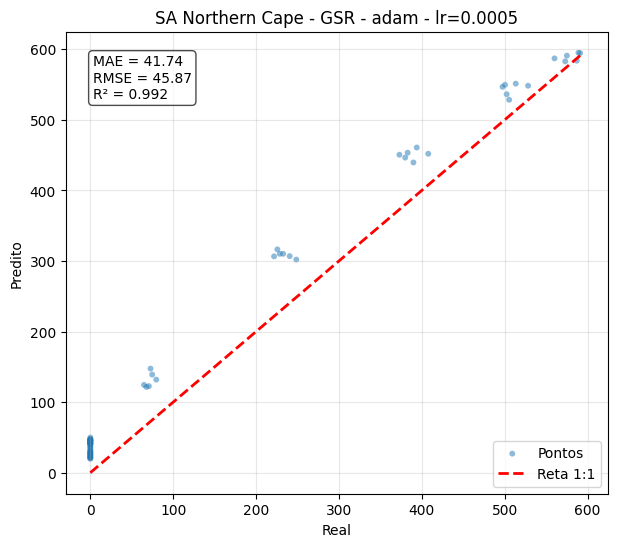

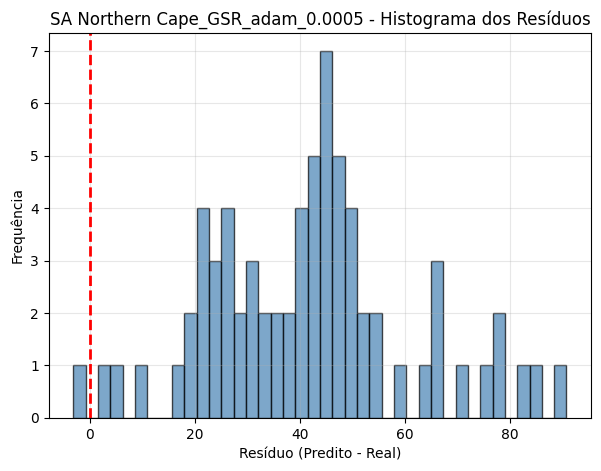

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


SA Northern Cape GSR adam 0.0001 :  44.150108337402344 103.37147156160881 0.8863100372075672


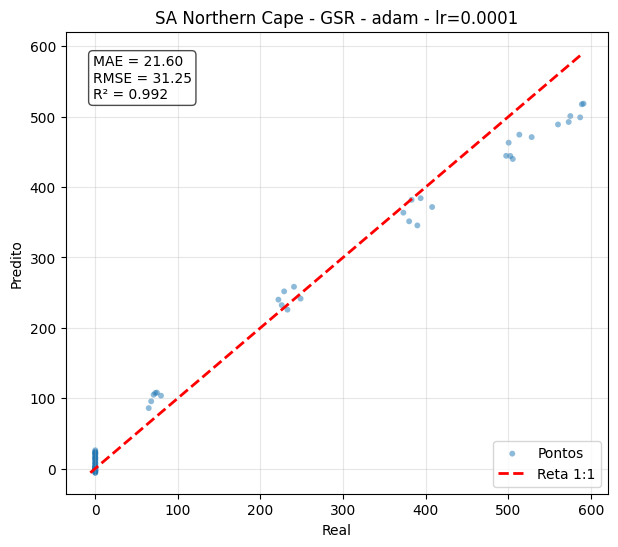

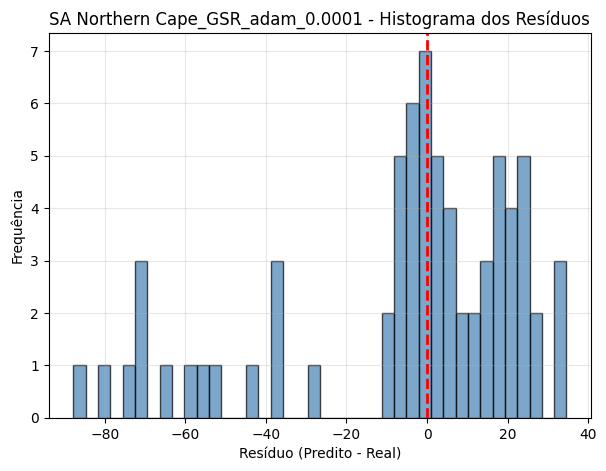

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


SA Northern Cape GSR sgd 0.001 :  44.17659378051758 103.5121284786836 0.8845960940463607


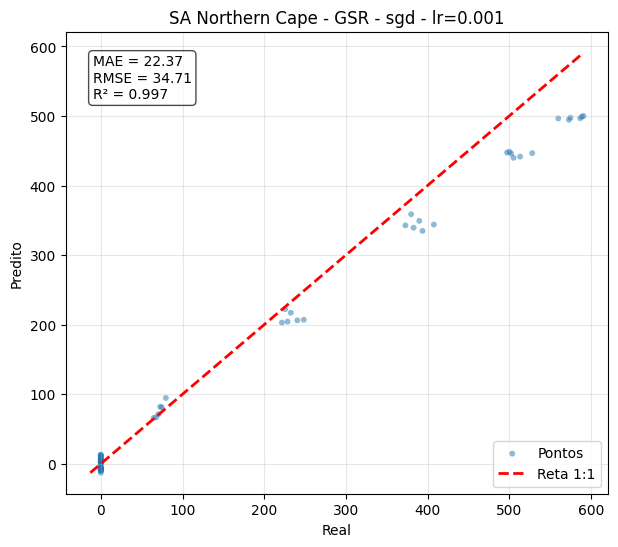

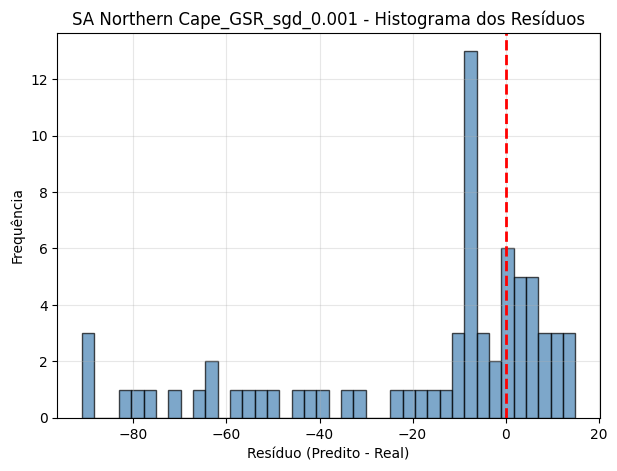

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


SA Northern Cape GSR sgd 0.0005 :  52.31498336791992 104.2689065964178 0.8843109646573536


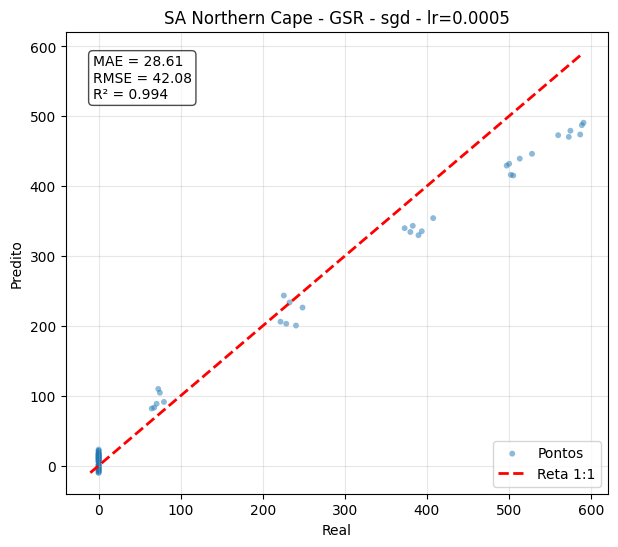

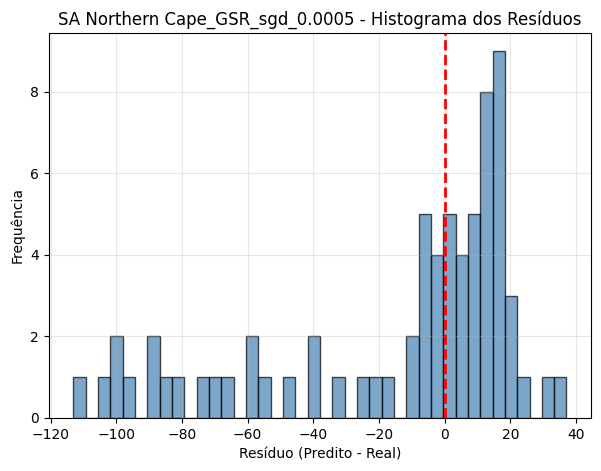

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


SA Northern Cape GSR sgd 0.0001 :  73.7808609008789 114.7673470343917 0.8655098454973156


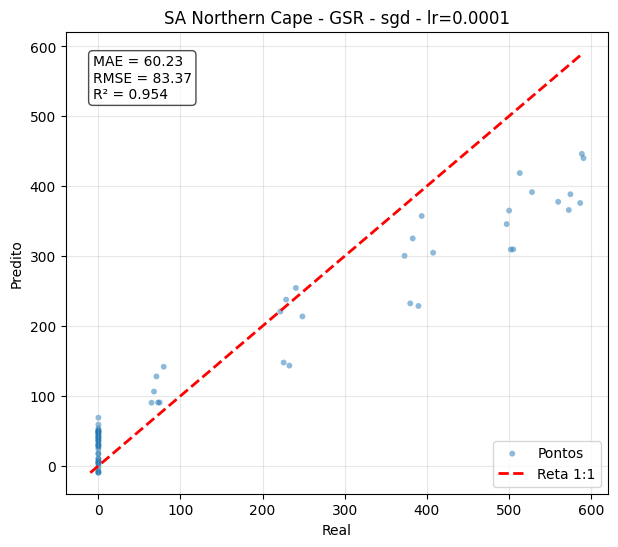

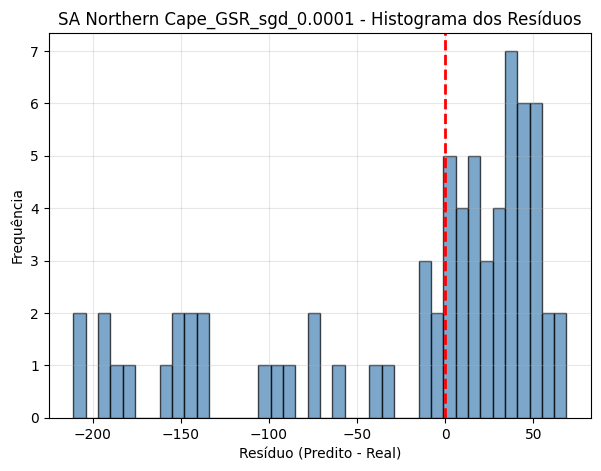

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


CAR Vakaga GSR adam 0.001 :  77.98641204833984 139.17087069498416 0.7736358993393951


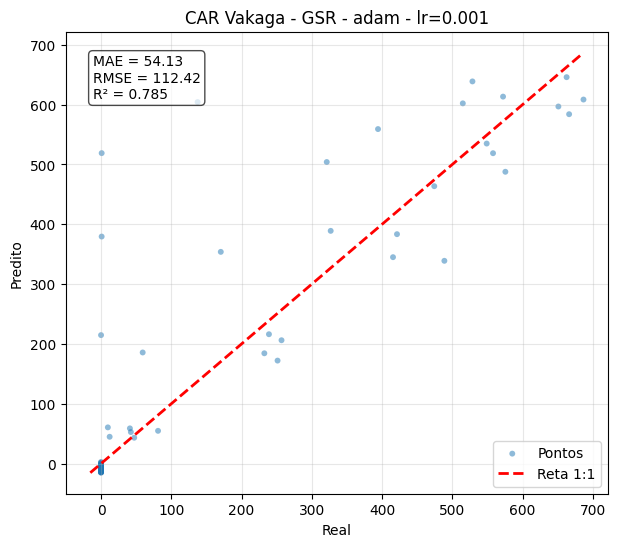

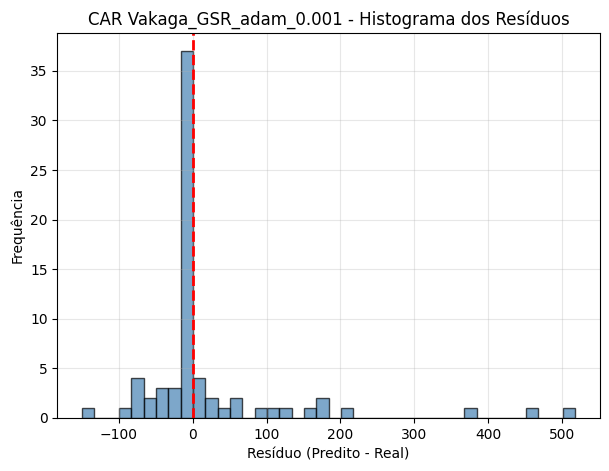

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


CAR Vakaga GSR adam 0.0005 :  74.80839538574219 133.8208340468703 0.7967185950046289


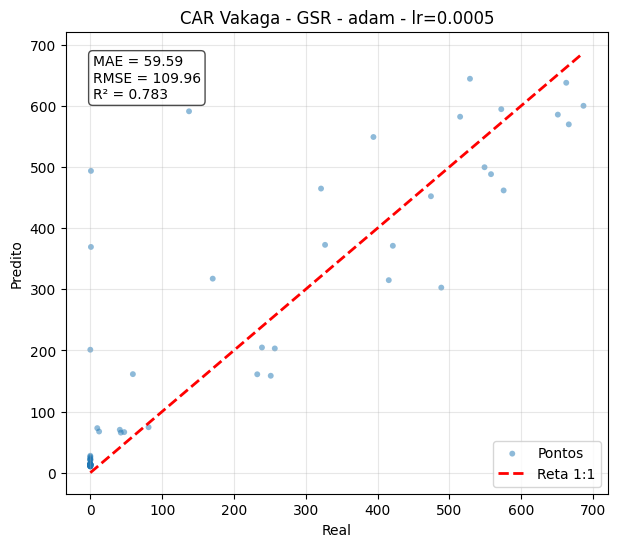

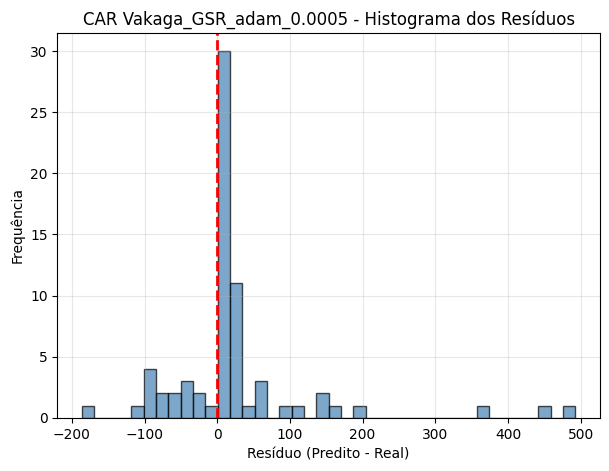

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


CAR Vakaga GSR adam 0.0001 :  53.6328239440918 95.76164154914795 0.8932611029089479


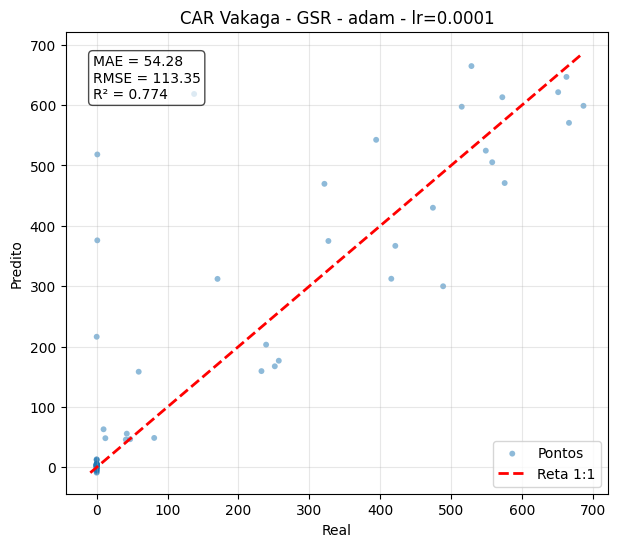

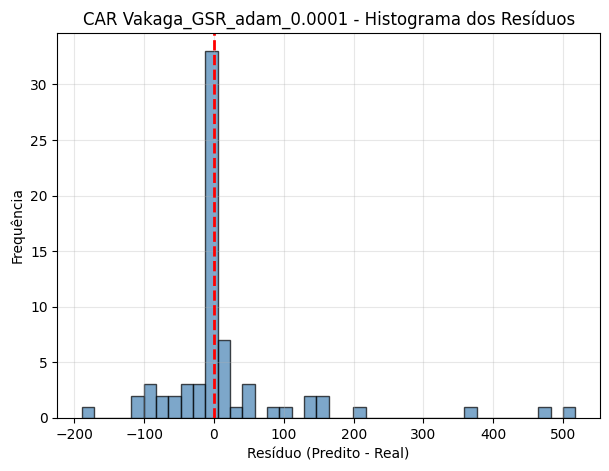

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


CAR Vakaga GSR sgd 0.001 :  53.95098114013672 93.89936538823092 0.8952774104523298


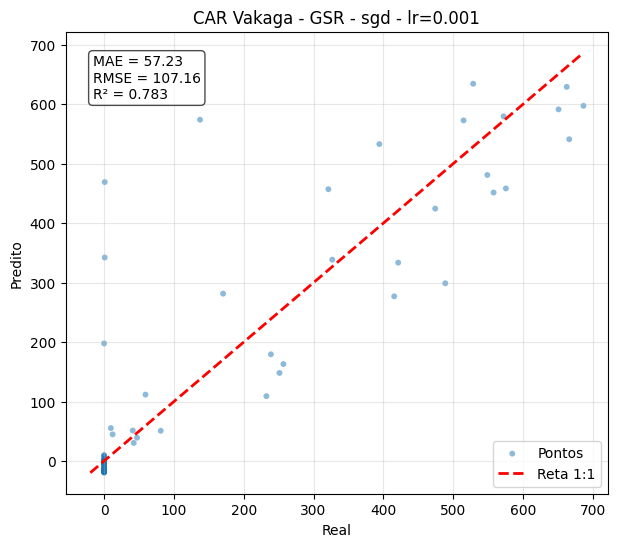

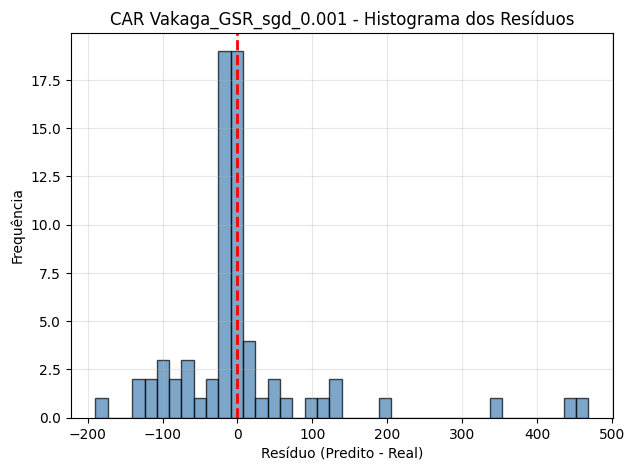

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


CAR Vakaga GSR sgd 0.0005 :  65.12694549560547 108.36244700944603 0.8604005852685753


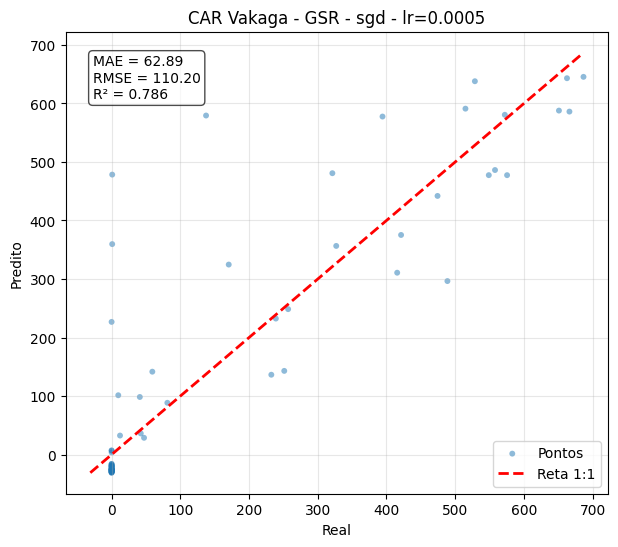

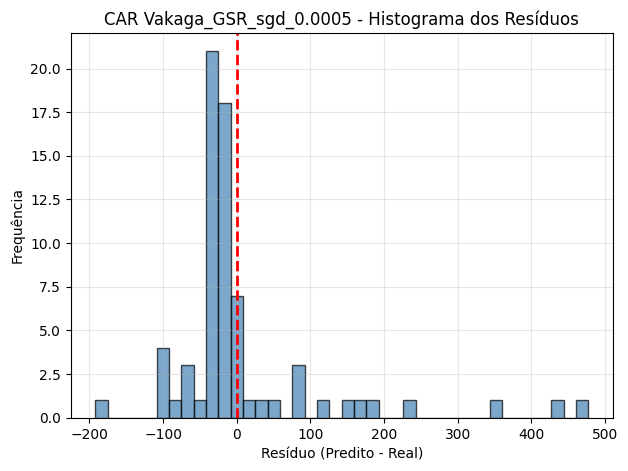

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


CAR Vakaga GSR sgd 0.0001 :  95.30426788330078 144.76299326398996 0.749582275395681


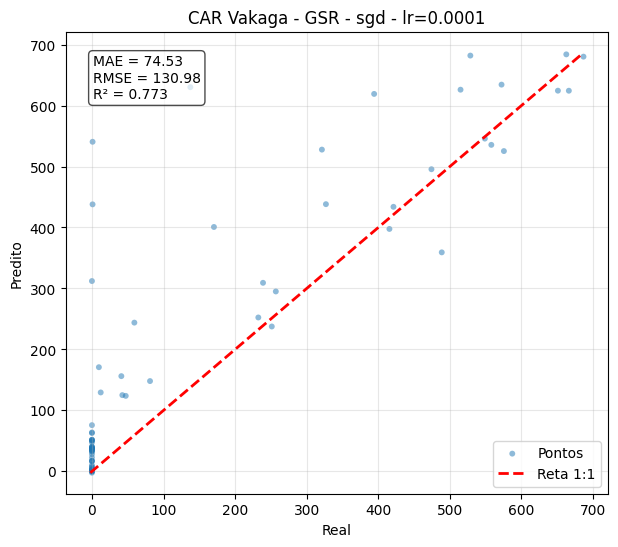

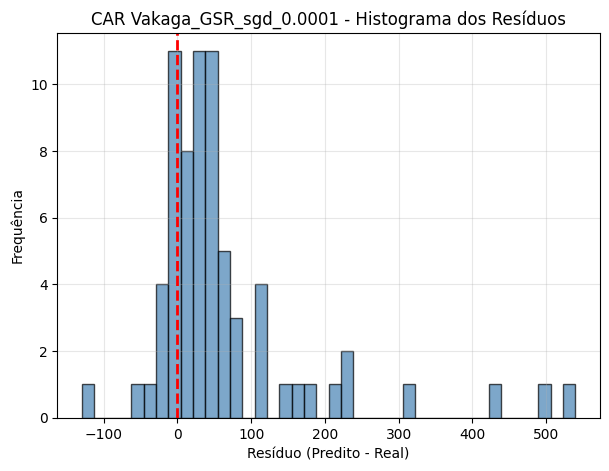

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Egypt Mut GSR adam 0.001 :  54.661502838134766 87.27286927182755 0.9279026736542478


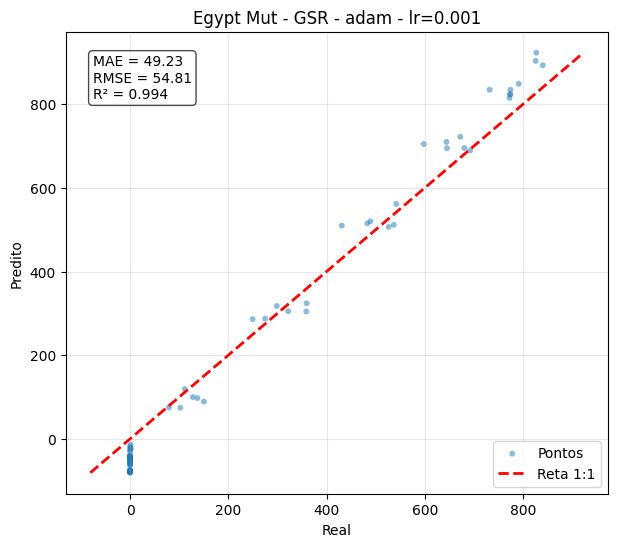

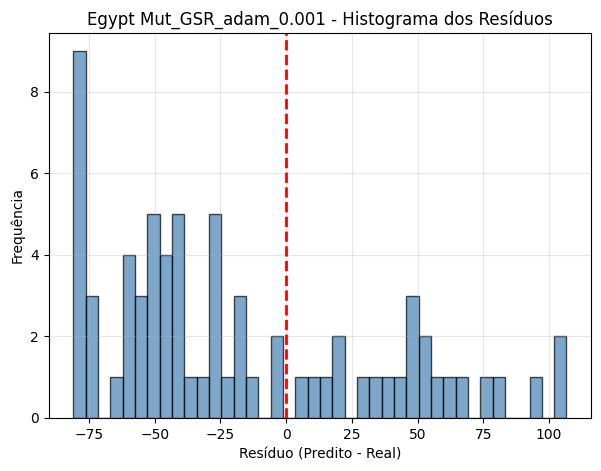

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Egypt Mut GSR adam 0.0005 :  47.051170349121094 84.95906068329322 0.9281919922060906


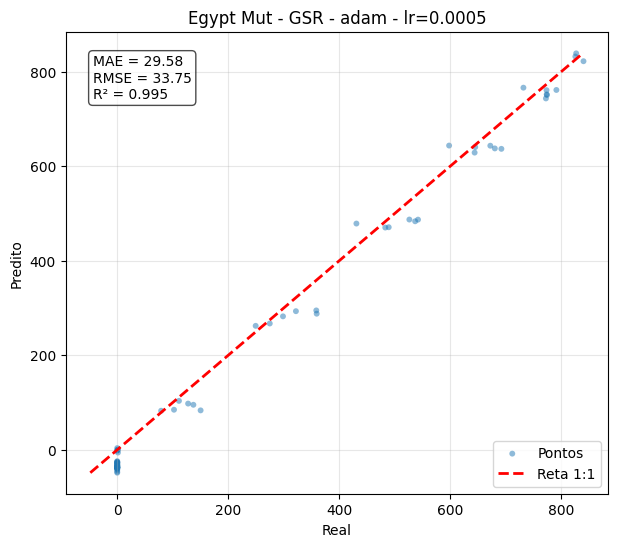

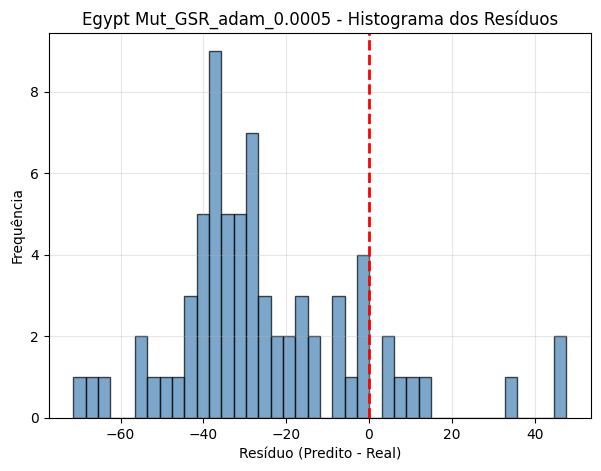

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Egypt Mut GSR adam 0.0001 :  36.172821044921875 73.78108455085219 0.9440796096983453


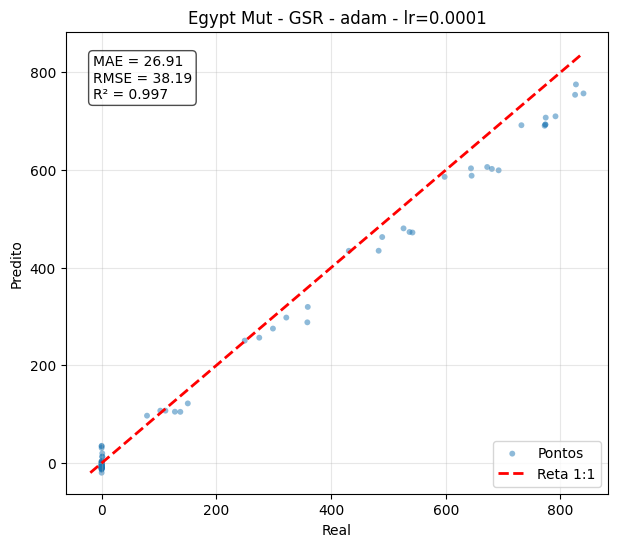

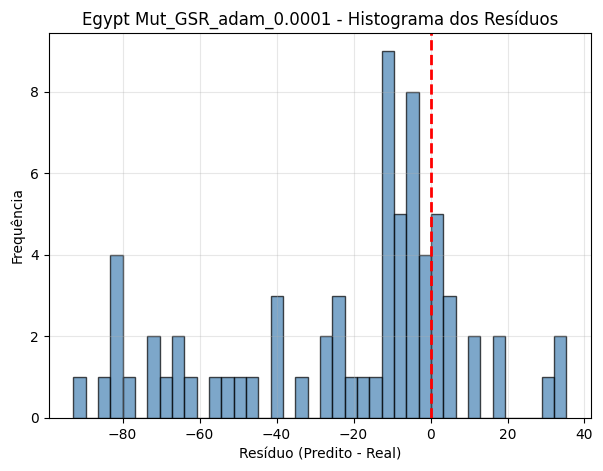

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Egypt Mut GSR sgd 0.001 :  56.99766540527344 94.63833294442585 0.9375841048312349


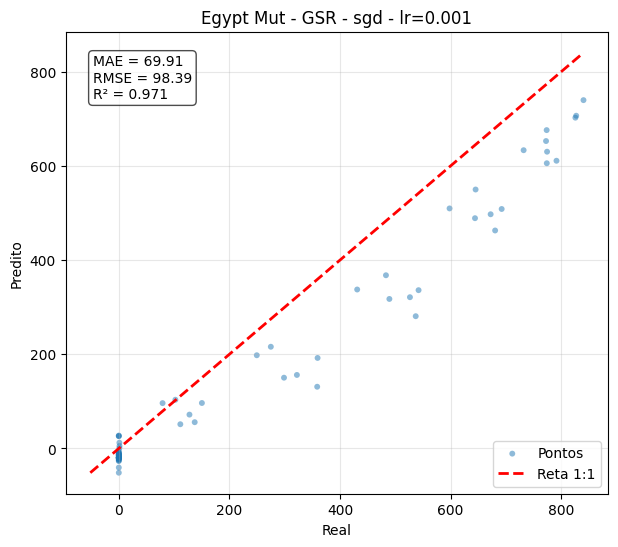

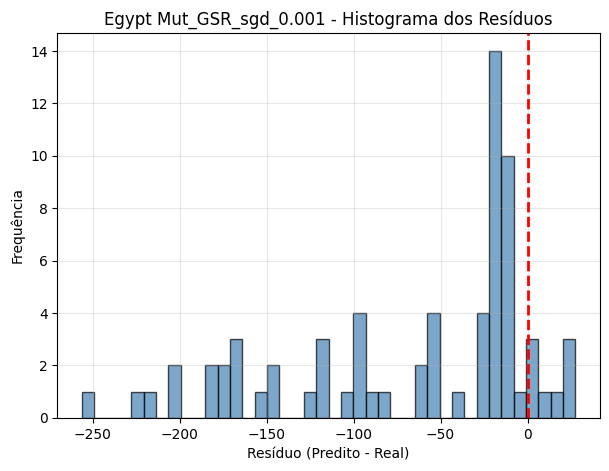

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Egypt Mut GSR sgd 0.0005 :  61.57490921020508 99.31518935156646 0.9321063778222034


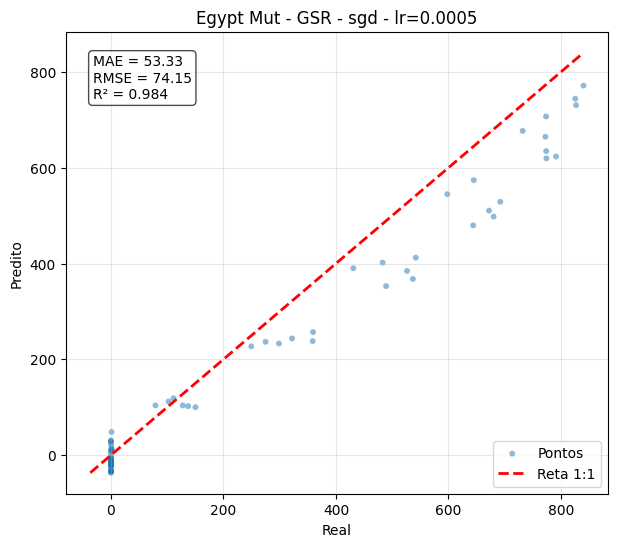

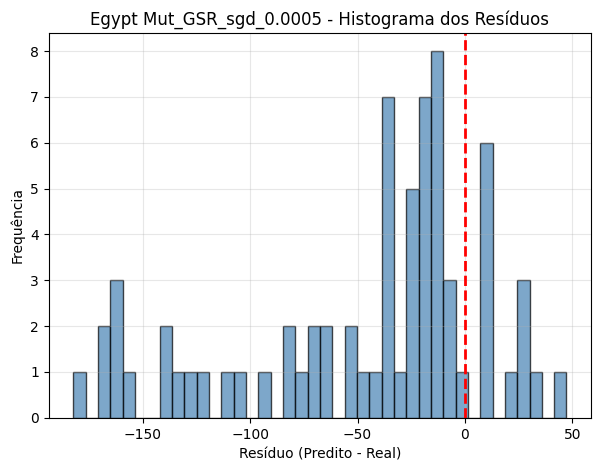

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Egypt Mut GSR sgd 0.0001 :  60.88887405395508 99.74395932523935 0.898442774152608


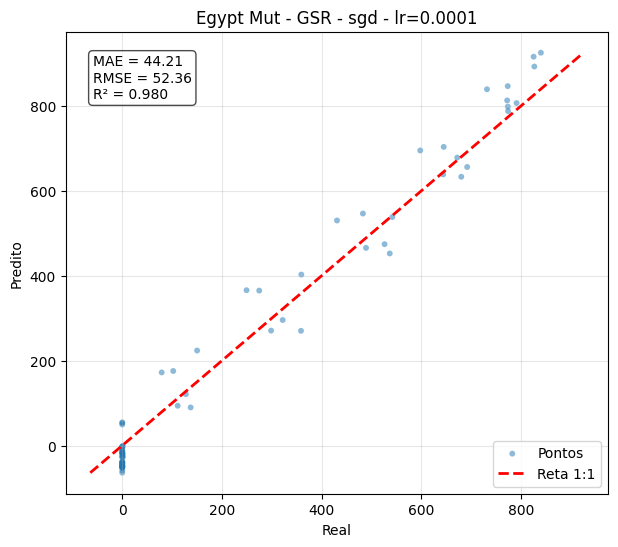

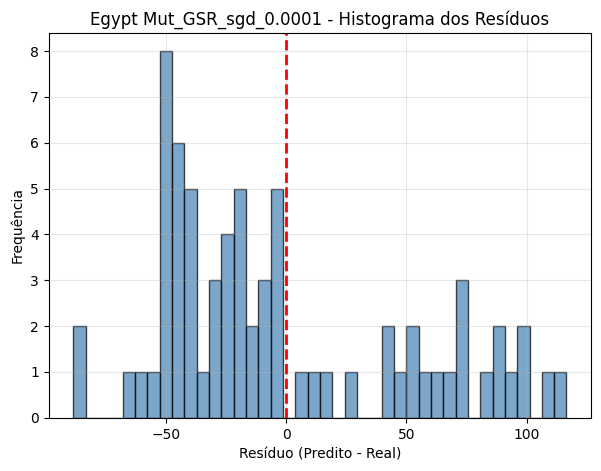

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Algeria Tamanrasset GSR adam 0.001 :  222.751953125 331.0223038180358 0.6747301887073093


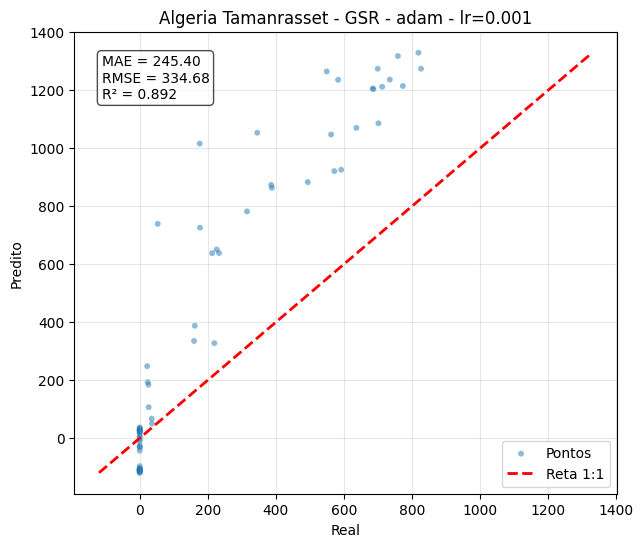

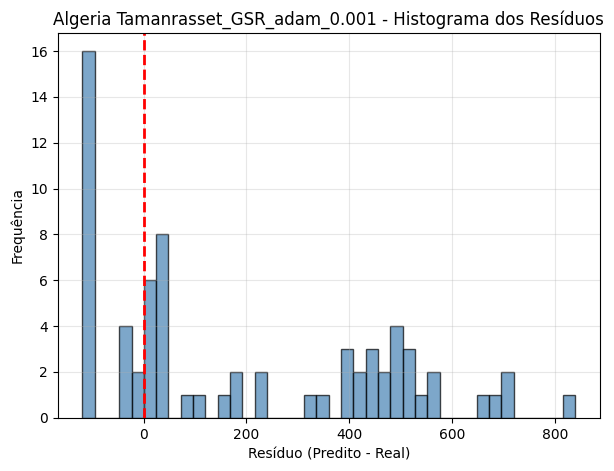

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Algeria Tamanrasset GSR adam 0.0005 :  95.75981140136719 154.8555463468293 0.8090237393567532


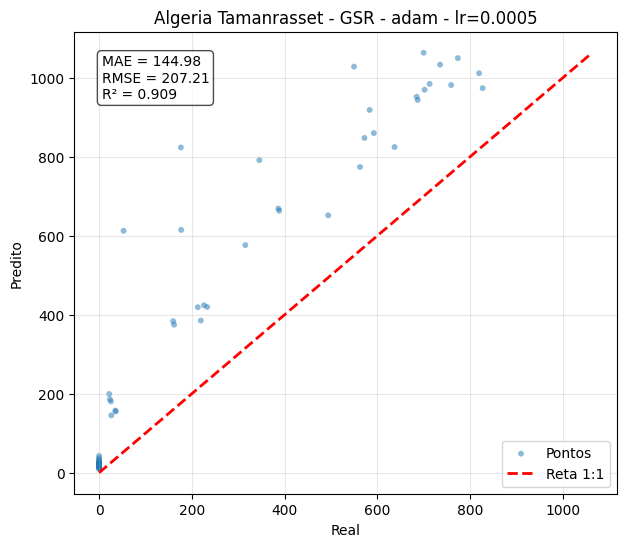

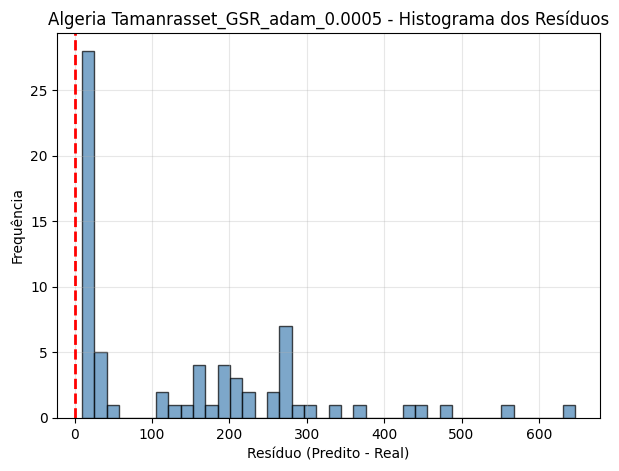

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Algeria Tamanrasset GSR adam 0.0001 :  51.20883560180664 101.63335509166023 0.8877201917746469


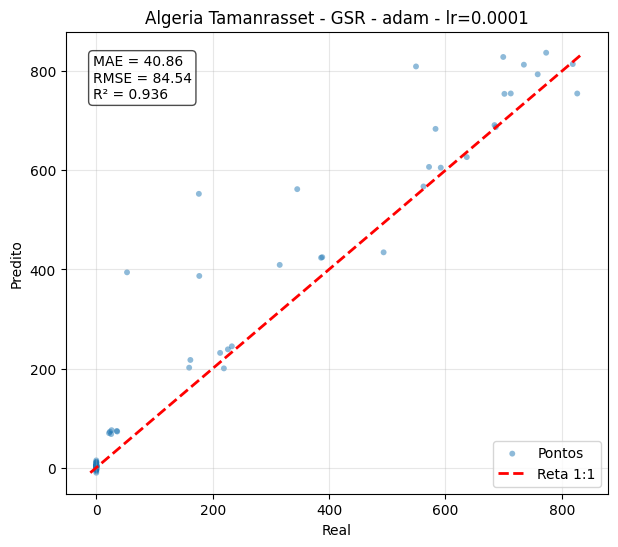

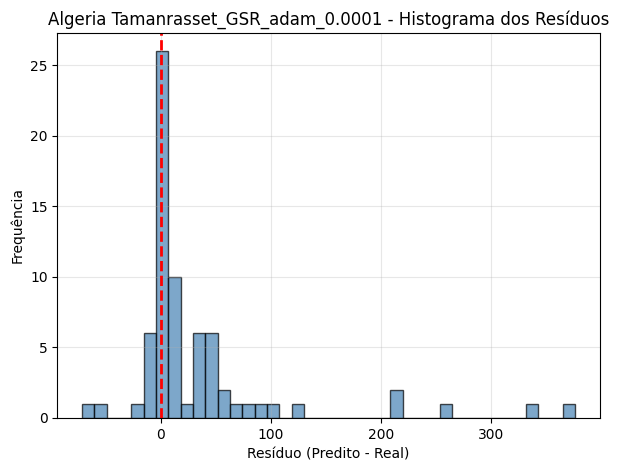

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Algeria Tamanrasset GSR sgd 0.001 :  49.646297454833984 99.70601806843206 0.8931260133041211


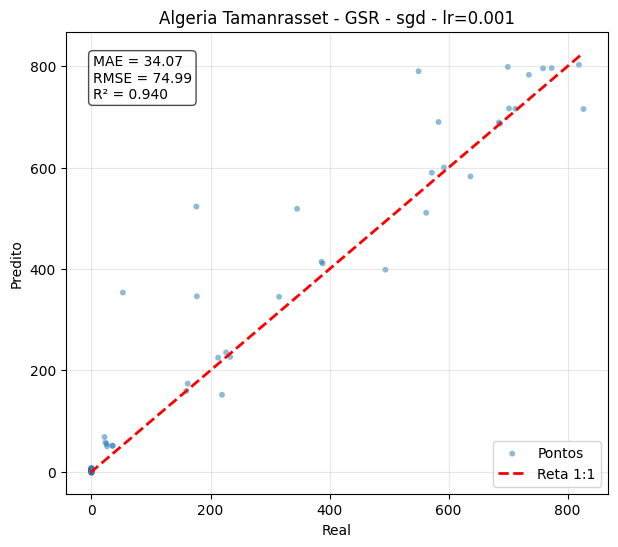

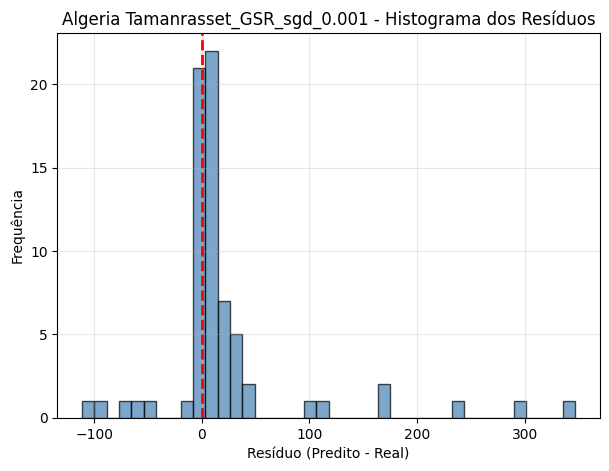

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Algeria Tamanrasset GSR sgd 0.0005 :  50.66472625732422 100.0425934680449 0.8924009703470274


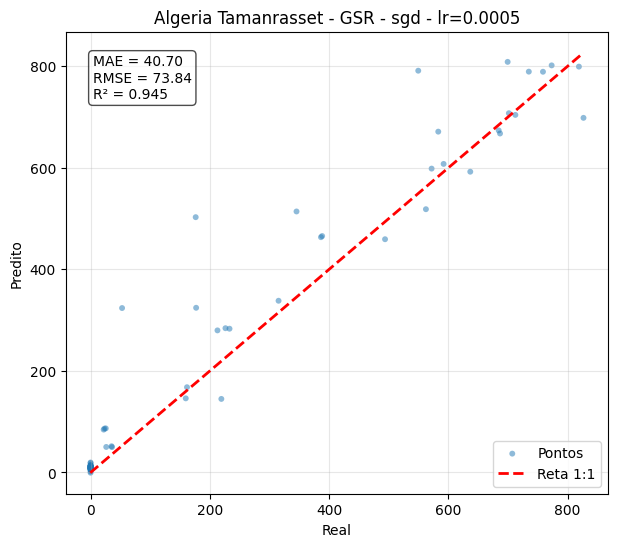

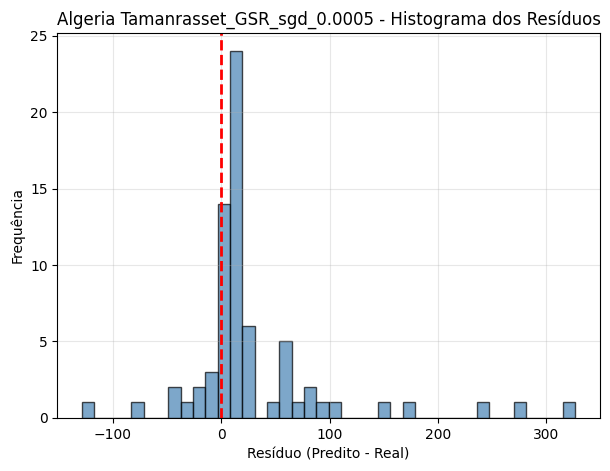

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Algeria Tamanrasset GSR sgd 0.0001 :  59.16725158691406 104.4571766697363 0.8817296118084181


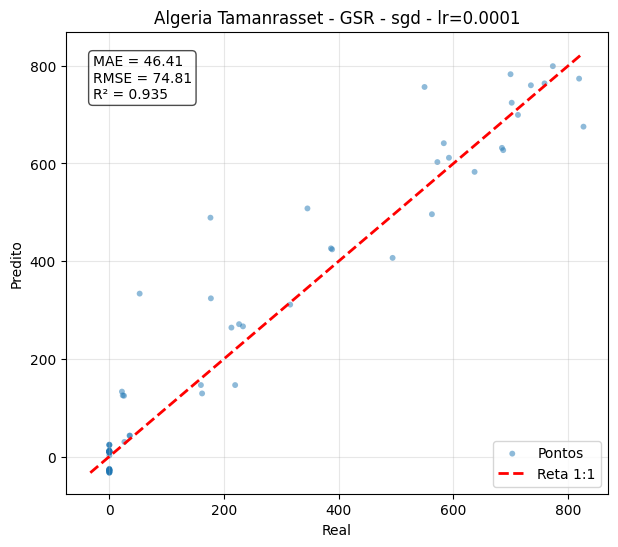

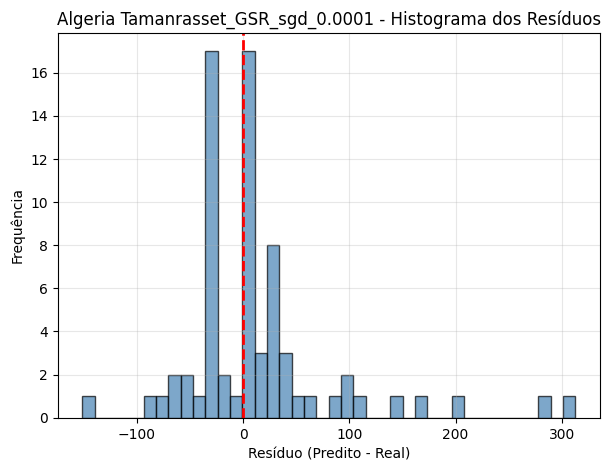

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Borno DSR adam 0.001 :  21.065567016601562 40.776634077848435 0.8840859315495257


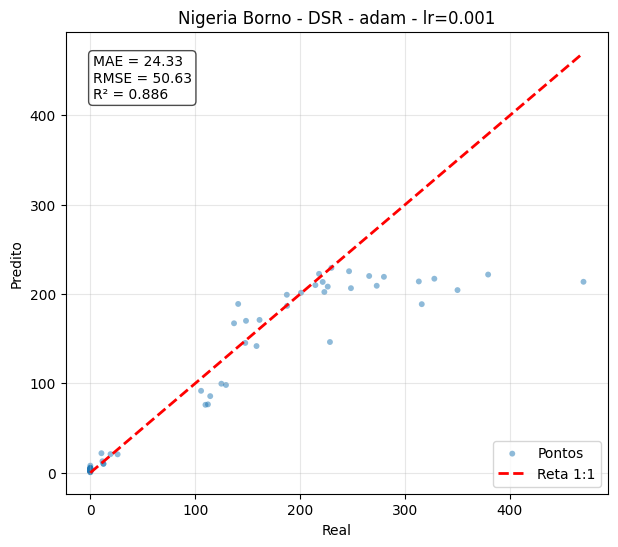

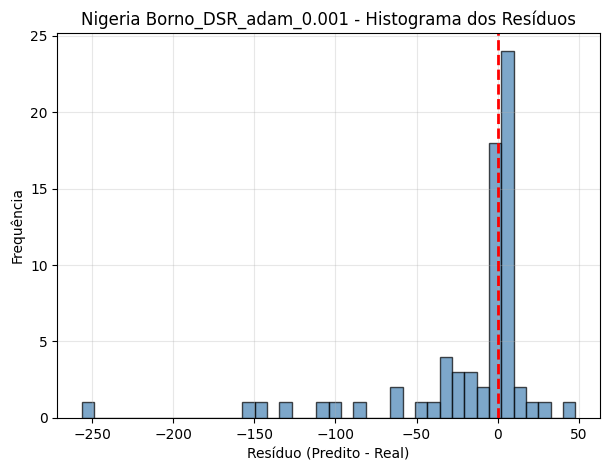

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Borno DSR adam 0.0005 :  18.051265716552734 35.611510604016786 0.8906492083267255


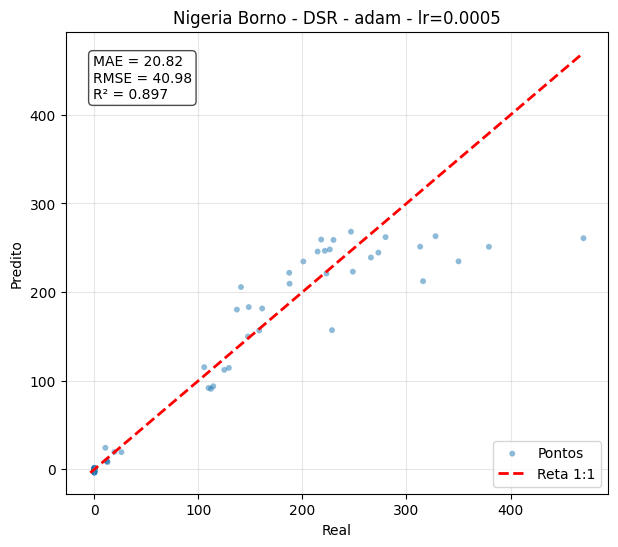

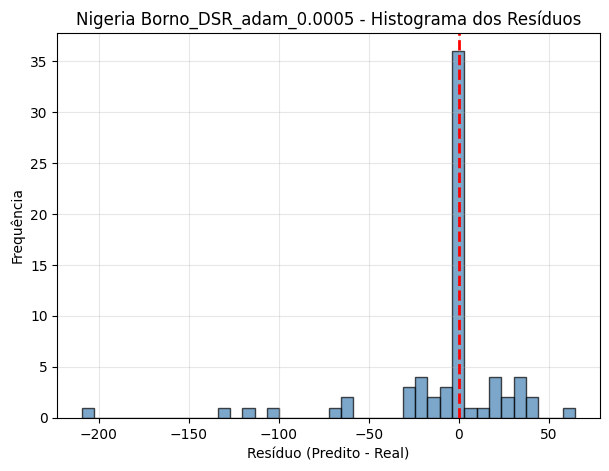

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Borno DSR adam 0.0001 :  19.214048385620117 35.6530111916406 0.8904277761182408


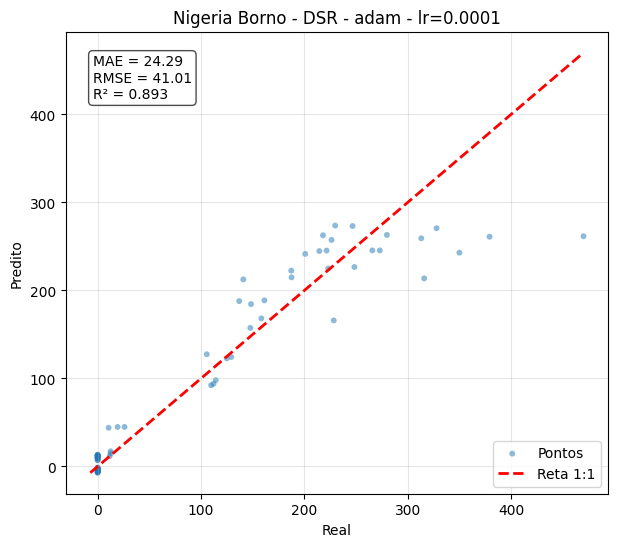

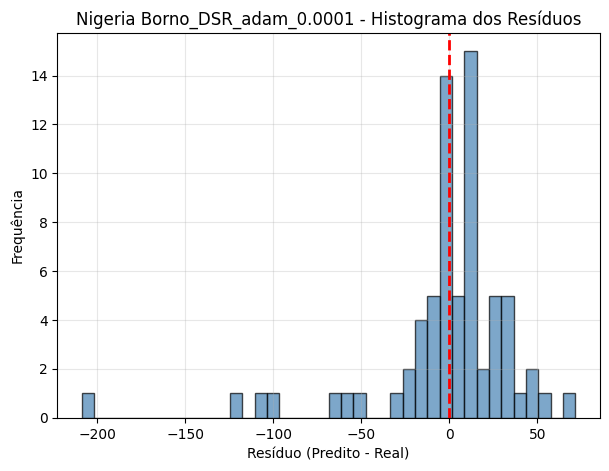

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Borno DSR sgd 0.001 :  19.693090438842773 35.96891459834189 0.8898608412629804


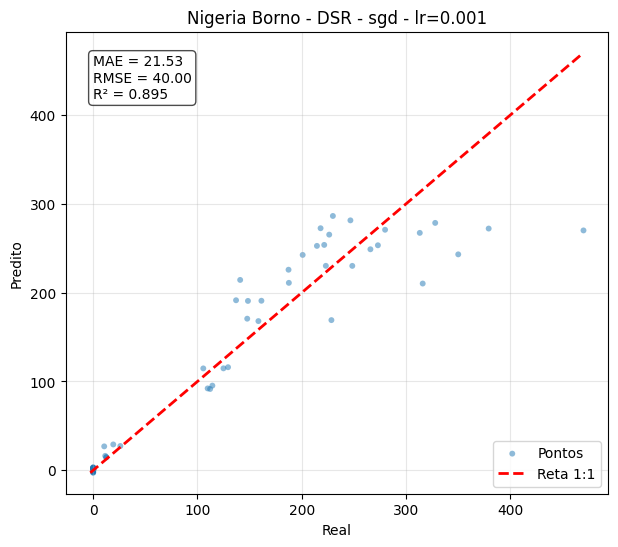

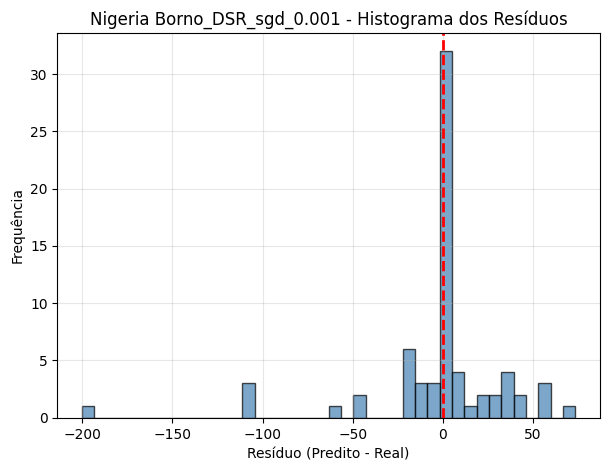

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Borno DSR sgd 0.0005 :  20.36896514892578 36.691628946745126 0.8839313734298709


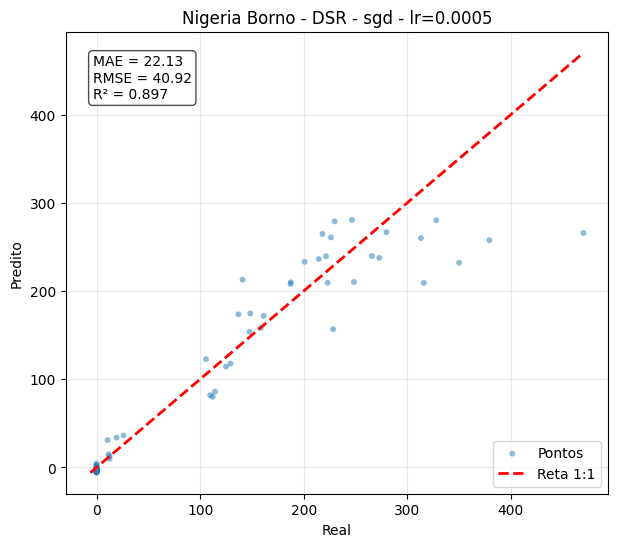

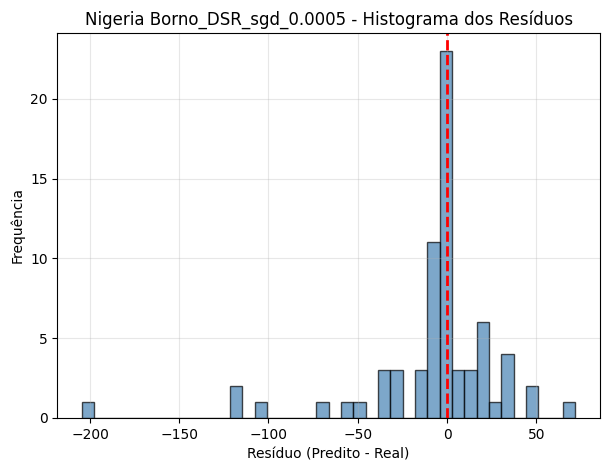

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Borno DSR sgd 0.0001 :  26.281116485595703 39.53701940359582 0.8654322195874172


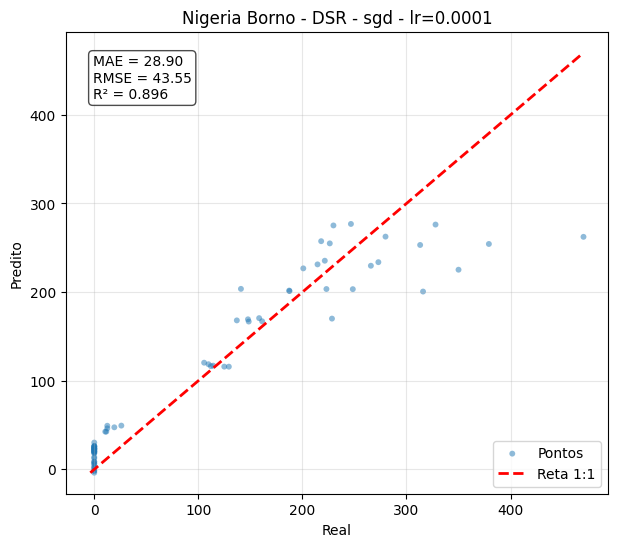

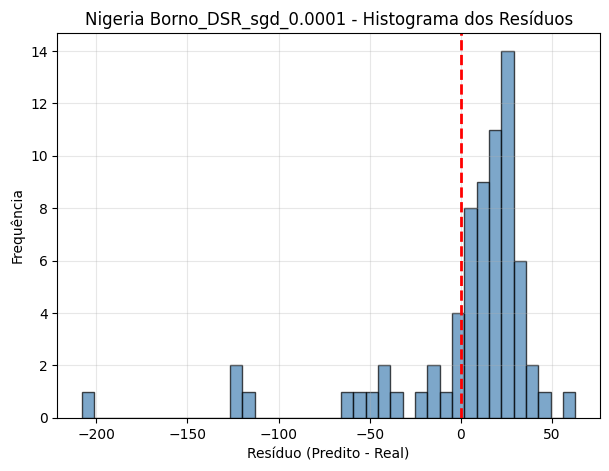

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Abuja DNI adam 0.001 :  57.22969055175781 71.47656207304077 0.602385104117486


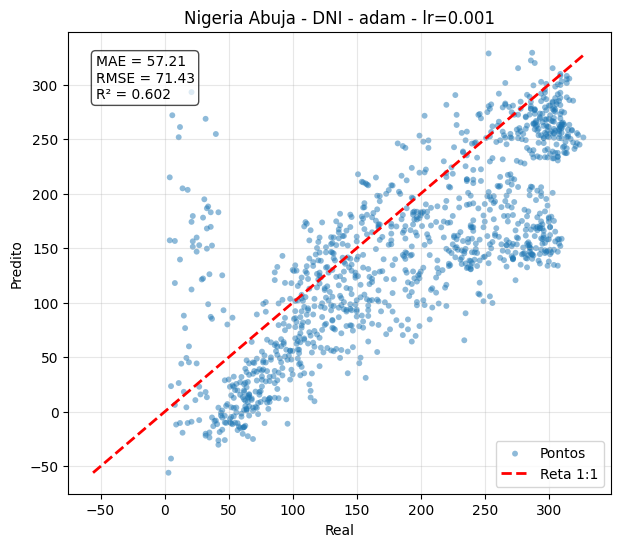

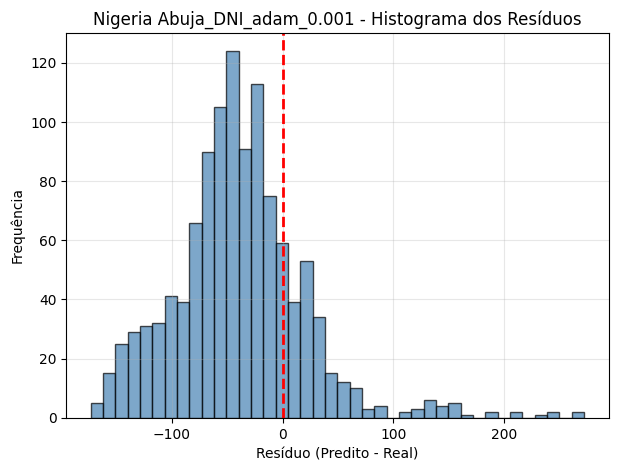

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Abuja DNI adam 0.0005 :  35.108131408691406 48.61376446751604 0.7307124131621778


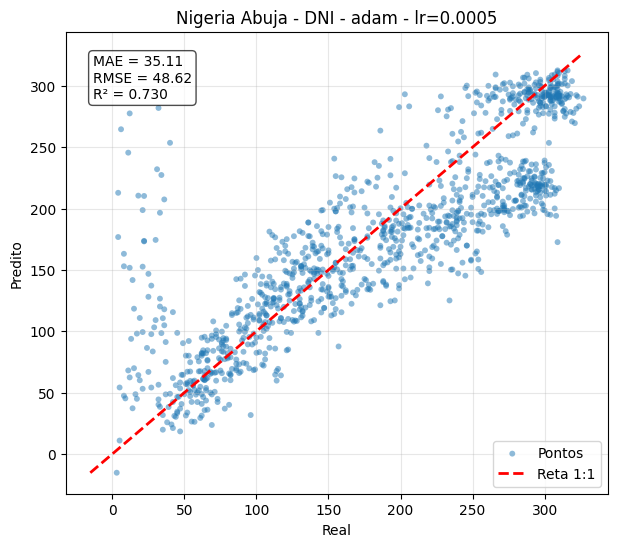

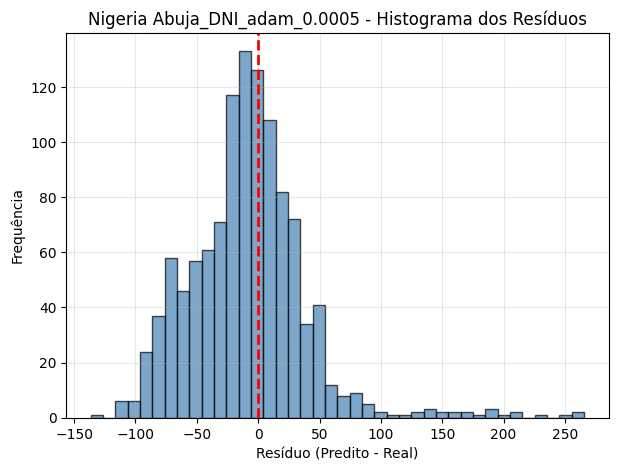

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Abuja DNI adam 0.0001 :  40.93409729003906 52.29662757634927 0.802610831810039


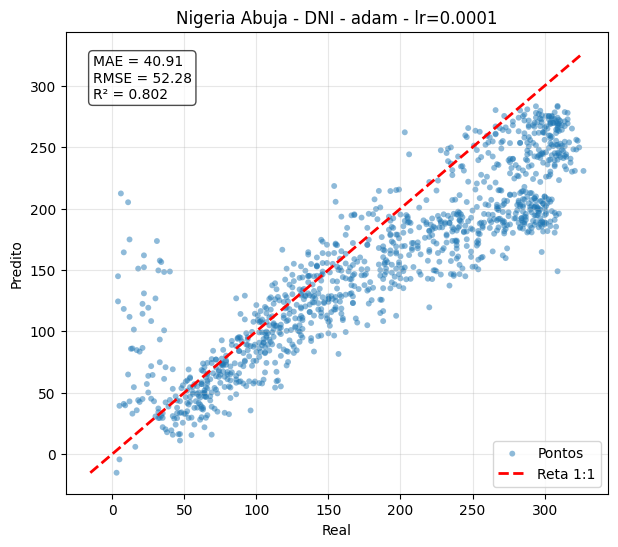

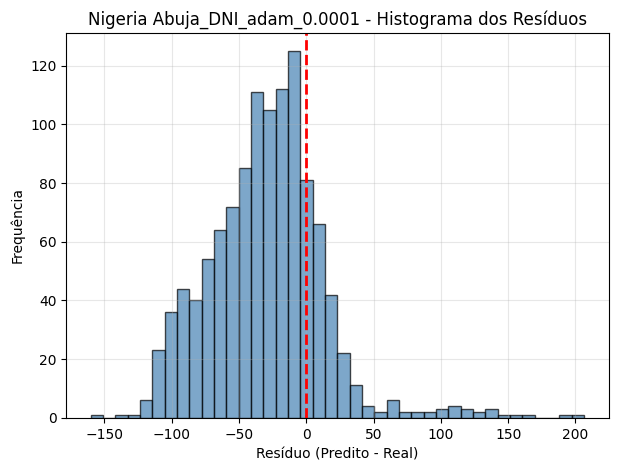

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Abuja DNI sgd 0.001 :  32.21002197265625 43.50125856880824 0.8151735868606991


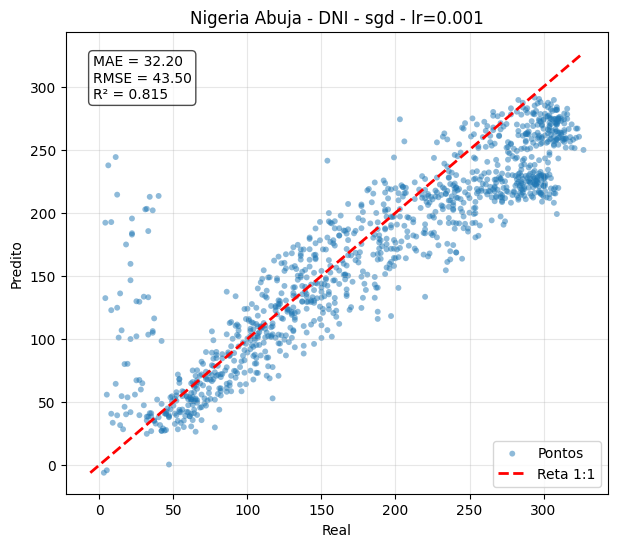

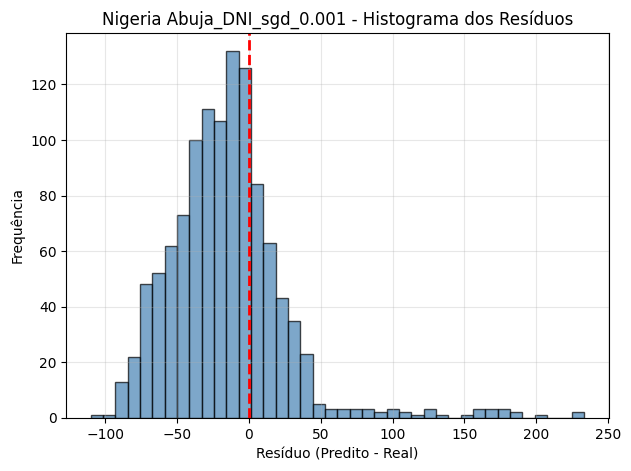

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Abuja DNI sgd 0.0005 :  27.2437744140625 38.6490826141328 0.8295688050496441


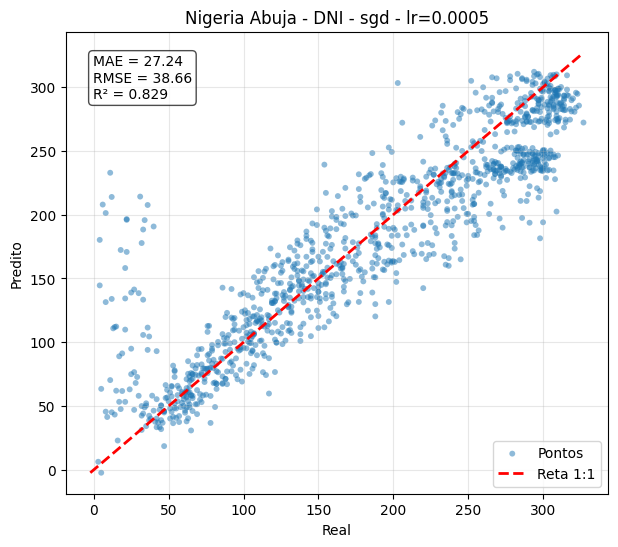

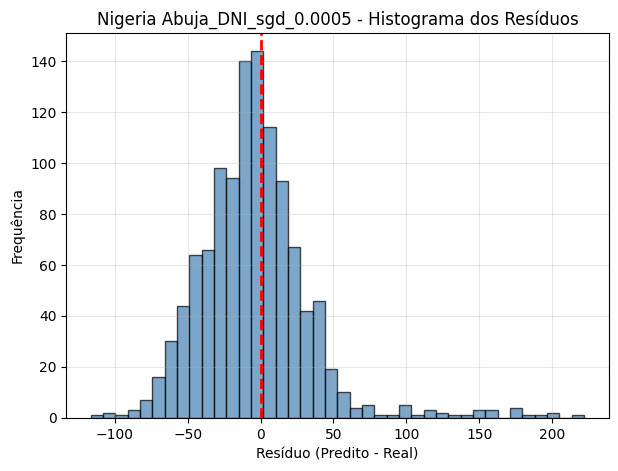

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Abuja DNI sgd 0.0001 :  37.807106018066406 51.61938859863486 0.7263404239320334


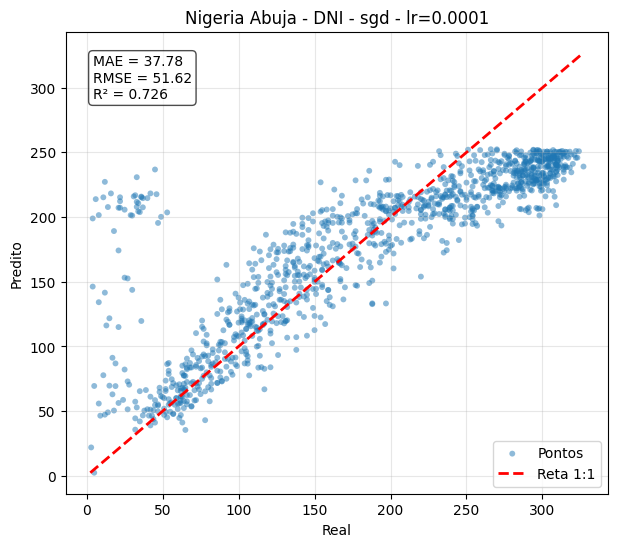

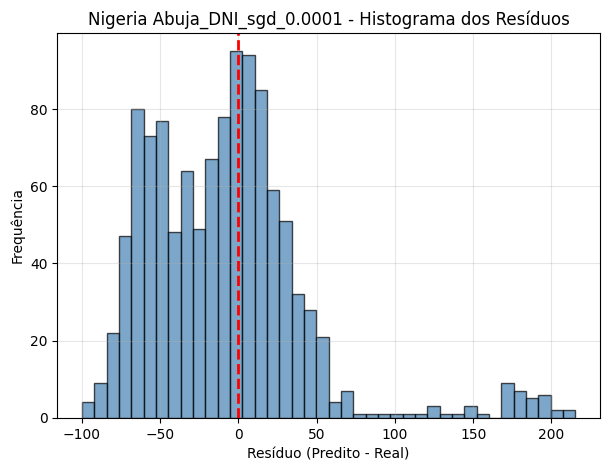

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Akure DNI adam 0.001 :  59.594200134277344 80.96133215731754 0.5231722840966503


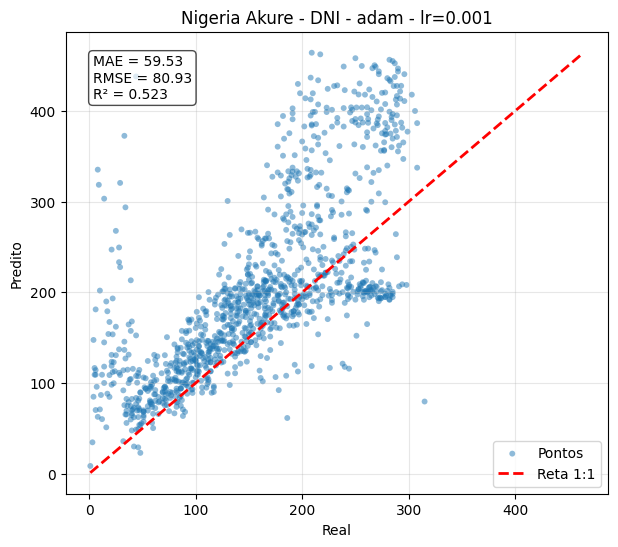

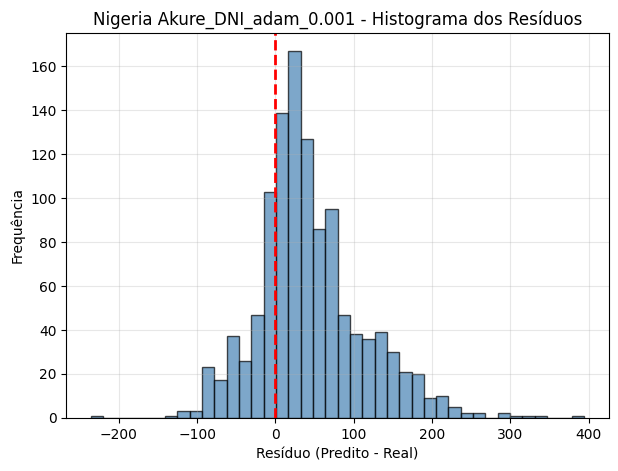

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Akure DNI adam 0.0005 :  50.11876678466797 64.3919425520383 0.4588955413611541


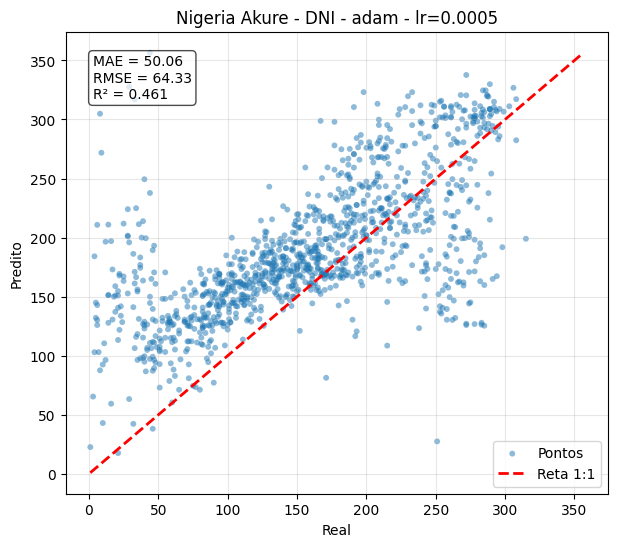

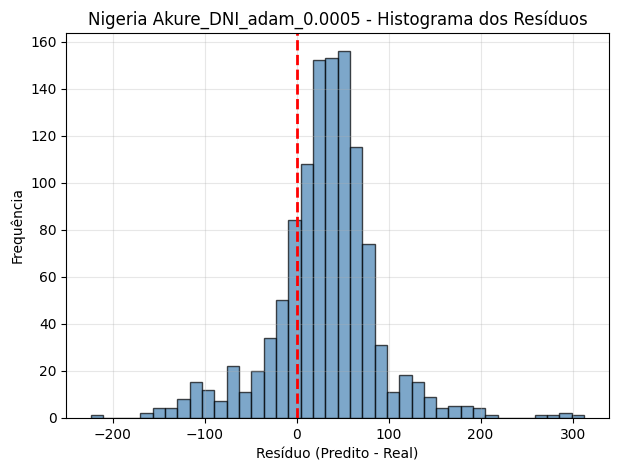

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Akure DNI adam 0.0001 :  37.234066009521484 49.81785181413386 0.6841739022608924


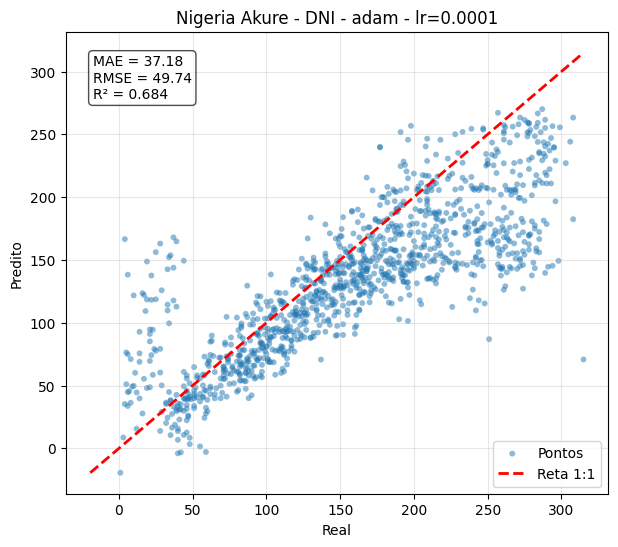

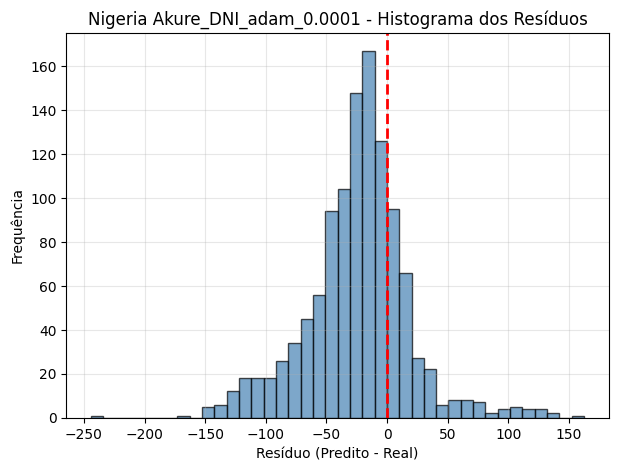

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Akure DNI sgd 0.001 :  35.90122604370117 45.09578293667685 0.7501948723507835


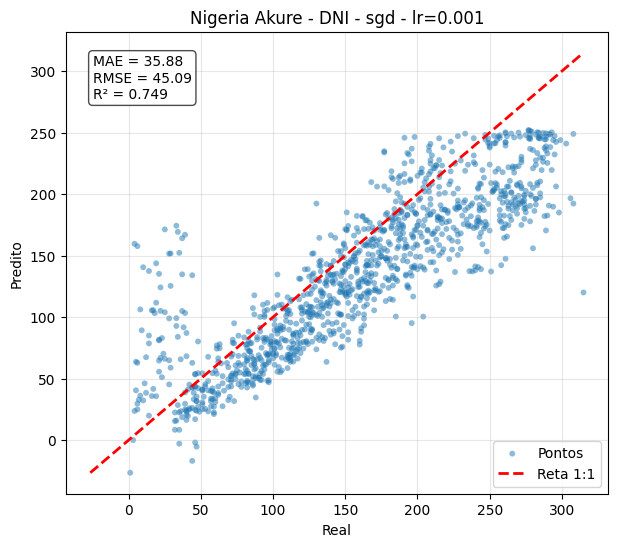

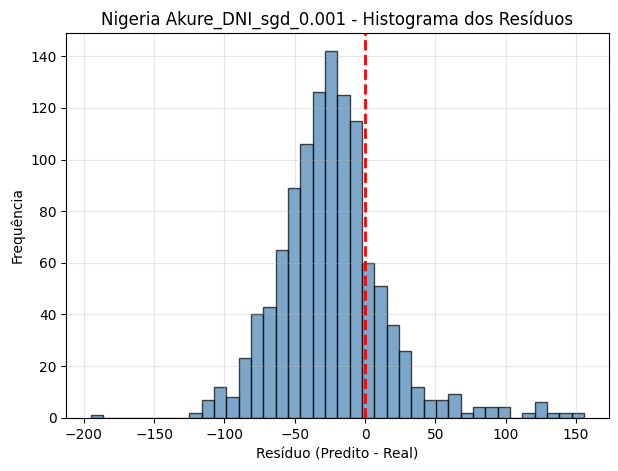

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Akure DNI sgd 0.0005 :  30.462265014648438 41.219711003296865 0.7424357153260216


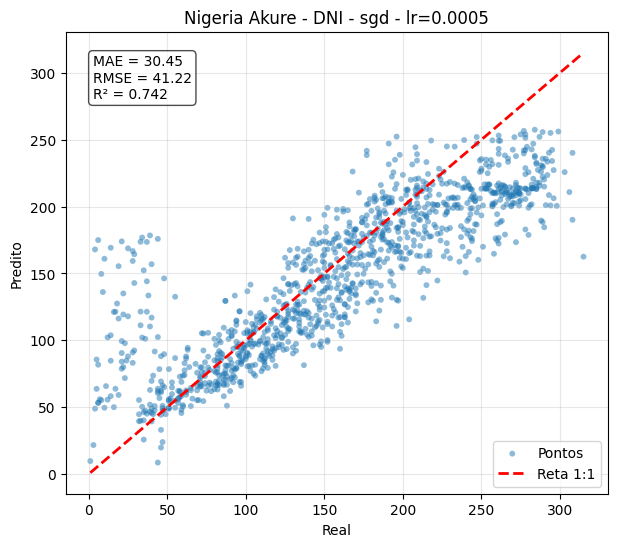

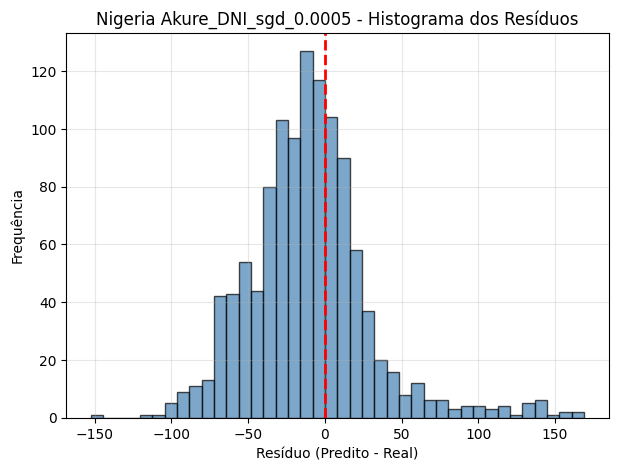

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7660\3016017712.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path))


Nigeria Akure DNI sgd 0.0001 :  36.120182037353516 50.702253459381616 0.597821510865267


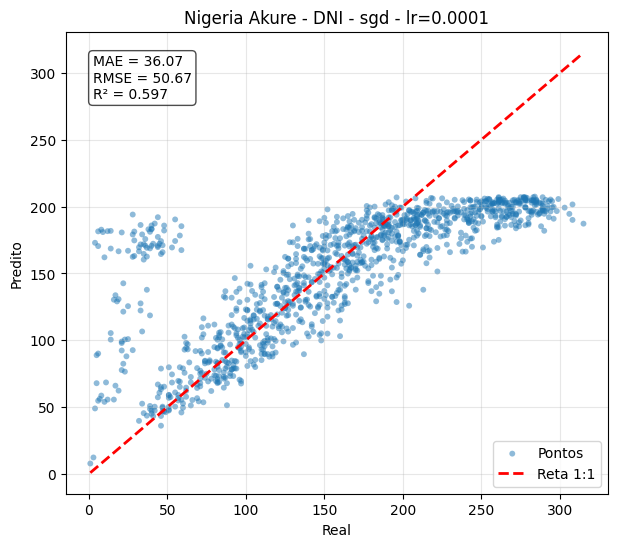

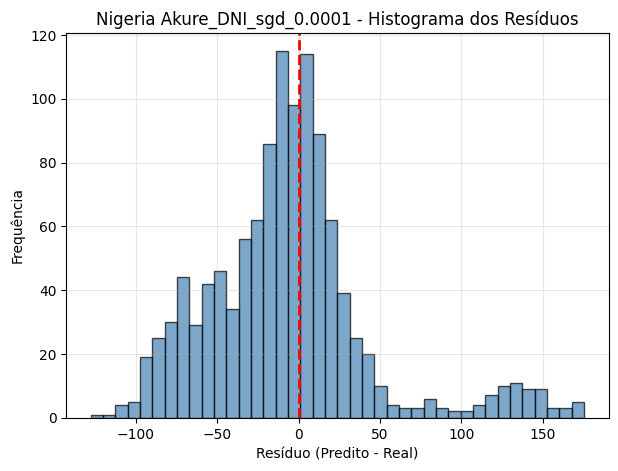

In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

metricas = []

for md in models_data:
  for opt_name in OTIMIZADORES:
    for lr in LRS:

      caminho = f"{md['cidade']}_{md['target']}_{opt_name}_{lr}"
      model_path = f"results3/models/{caminho}.pth"

      if not os.path.exists(model_path):
        print(f"Modelo não encontrado: {model_path}")
        continue

      model = Model(
          num_features=md["qnt_features"],
          num_outputs=1,
          neurons=md["params"]["neurons"],
          dropouts=md["params"]["dropouts"]
      )

      model.load_state_dict(torch.load(model_path))
      model.eval()

      preds, reals = [], []

      with torch.no_grad():
          for Xb, yb in md["test_loader"]:
              pred = model(Xb).cpu().numpy().reshape(-1)
              preds.append(pred)
              reals.append(yb.cpu().numpy().reshape(-1))

      preds = np.concatenate(preds).reshape(-1, 1)
      reals = np.concatenate(reals).reshape(-1, 1)

      # DESNORMALIZAÇÃO AQUI
      scaler_y = md["scaler_y"]
      preds = scaler_y.inverse_transform(preds).reshape(-1)
      reals = scaler_y.inverse_transform(reals).reshape(-1)

      # print("NaNs reals:", np.isnan(reals).any())
      # print("NaNs preds:", np.isnan(preds).any())
      # print("std reals:", np.std(reals))
      # print("std preds:", np.std(preds))

      mae = mean_absolute_error(reals, preds)
      rmse = np.sqrt(mean_squared_error(reals, preds))
      #r = np.corrcoef(reals, preds)[0,1] ** 2
      r = np.corrcoef(reals.reshape(-1), preds.reshape(-1))[0, 1] ** 2

      print(md["cidade"], md["target"], opt_name, lr, ": ", mae, rmse, r)

      metricas.append({
          "cidade": md["cidade"],
          "target": md["target"],
          "optimizer": opt_name,
          "lr": lr,
          "MAE": mae,
          "RMSE": rmse,
          "R": r
      })

      dataset_type = md['tipo']
      target = md['target']

      if dataset_type == 'wb':
        s, f = 9_500, 10_500

        if md['cidade'] == 'Touba':
          s += 720
          f += 720

        reals = reals[s: f]
        preds = preds[s: f]
        intervalo = list(range(s, f))
        xlabel = 'Time [min]'
        marker = False

        if target == 'dhi_rsi':
          ylabel = 'Diffused Horizontal Irradiance in W/m²'
        elif target == 'ghi_pyr':
          ylabel = 'Global Horizontal Irradiance from thermopile pyranometer in W/m²'
        elif target == 'ghi_sil':
          ylabel = 'Global Horizontal Irradiance from silicon pyranometer in W/m²'

      elif dataset_type == 'tmy':
        s, f = 5000, 5070
        reals = reals[s:f]
        preds = preds[s:f]
        intervalo = list(range(s, f))
        xlabel = 'Time [h]'
        marker = True

        if target == 'GSR':
          ylabel = 'Global beam direct solar irradiance in W/m²'
        elif target == 'DSR':
          ylabel = 'Diffused solar irradiance in W/m2'

      elif dataset_type == 'sarah':
        s, f = 0, 1_140
        reals = reals[s:f]
        preds = preds[s:f]
        intervalo = list(range(s, f))
        xlabel = 'Timestep [Days]'
        marker = False

        ylabel = 'Direct Normal Irradiance [W/m²]'



      #criar_plot(reals, preds, intervalo, xlabel, ylabel, marker, caminho)
      os.makedirs('results3/plots/scatter', exist_ok=True)
      plot_scatter_real_pred(
        reals, preds,
        title=f"{md['cidade']} - {md['target']} - {opt_name} - lr={lr}",
        savepath=f"results3/plots/scatter/scatter_{caminho}.png"
      )

      os.makedirs('results3/plots/histograma', exist_ok=True)
      plot_residual_histogram(
          reals, preds,
          title=f"{caminho}",
          savepath=f"results3/plots/histograma/residual_hist_{caminho}.png"
      )





In [17]:
df_metricas = pd.DataFrame(metricas)
os.makedirs('results3/csvs', exist_ok=True)
df_metricas.to_csv("results3/csvs/metricas_modelos.csv", index=False)